<a href="https://colab.research.google.com/github/safednn-nasa/Prophecy/blob/master/LFW_Prophecy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import io
import os
from collections import namedtuple
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import tree
from tqdm import tqdm
import operator
import pandas as pd



In [2]:
import shutil
import numpy as np

import keras
import keras.backend as K

K.set_image_data_format('channels_last')

Using TensorFlow backend.


In [0]:
from matplotlib import pyplot as plt
# get_ipython().run_line_magic('matplotlib', 'inline')

# helper to simplify displaying multiple images
def imshow(image, width=64, height=64, size=None):
    
    im = np.array(image, copy=True)
    if image.min() < 0:
        im -= im.min()
    im /= im.max()
    im = (im*255.).astype(np.uint8)
    if np.ndim(im) == 3:
        im = np.expand_dims(im, 0)
 
    n = len(im)
    s = int(np.ceil(np.sqrt(n)))
    
    if size is None:
        size = 2*s
    
    fig, axs = plt.subplots(s, s)
    fig.set_size_inches(size,size)
    if s == 1:
        axs.imshow(im[0])
    else:
        cnt = 0
        for i in range(s):
            for j in range(s):
                if cnt < n:
                    axs[i,j].imshow(im[cnt, :,:,:])
                axs[i,j].axis('off')
                axs[i,j].set_aspect('equal')
                cnt += 1
        fig.subplots_adjust(wspace=0, hspace=0.)

    plt.show()


In [0]:
from sklearn.datasets import fetch_olivetti_faces, fetch_lfw_people

# Use only classes that have at least 100 images
# There are five such classes in LFW
lfw_slice = (slice(68, 196, None), slice(61, 190, None))
faces_data = fetch_lfw_people(min_faces_per_person=100, color=True, slice_=lfw_slice)
images = faces_data.images
n_classes = faces_data.target.max()+1
x, y = faces_data.data, keras.utils.to_categorical(faces_data.target, n_classes)
images /= 255.0

# Use 3/4 for training, the rest for testing
N_tr = int(len(x)*0.75)
N_te = len(x) - N_tr
x_tr, y_tr = x[:N_tr], y[:N_tr]
x_te, y_te = x[N_tr:], y[N_tr:]
im_tr, im_te = images[:N_tr], images[N_tr:]


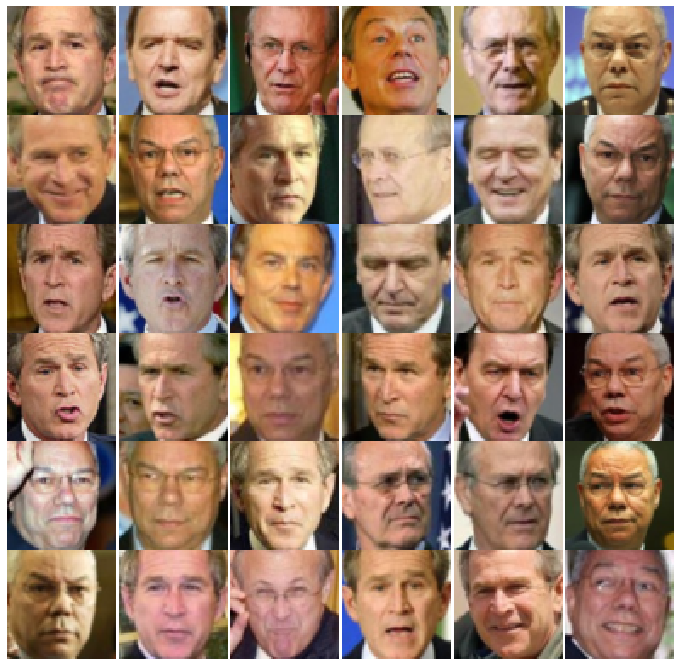

In [5]:
imshow(images[:36])

In [6]:
K.clear_session()
inp = keras.layers.Input(shape=im_tr[0].shape)
print(inp.name)
out = keras.layers.Conv2D(128, (3,3), activation='relu')(inp)
print(out.name)
out = keras.layers.MaxPooling2D(pool_size=(2,2))(out)
print(out.name)
out = keras.layers.Conv2D(64, (3,3), activation='relu')(out)
print(out.name)
out = keras.layers.MaxPooling2D(pool_size=(2,2))(out)
print(out.name)
out = keras.layers.Conv2D(32, (3,3), activation='relu')(out)
print(out.name)
out = keras.layers.MaxPooling2D(pool_size=(2,2))(out)
print(out.name)
out = keras.layers.Conv2D(16, (3,3), activation='relu')(out)
print(out.name)
out = keras.layers.MaxPooling2D(pool_size=(2,2))(out)
print(out.name)
out = keras.layers.Flatten()(out)
print(out.name)
out = keras.layers.Dense(16, activation='relu')(out)
print(out.name)
out = keras.layers.Dense(y[0].shape[0], activation='softmax')(out)
print(out.name)

model = keras.Model(inp, out)
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])
model.summary()






input_1:0

conv2d_1/Relu:0

max_pooling2d_1/MaxPool:0
conv2d_2/Relu:0
max_pooling2d_2/MaxPool:0
conv2d_3/Relu:0
max_pooling2d_3/MaxPool:0
conv2d_4/Relu:0
max_pooling2d_4/MaxPool:0
flatten_1/Reshape:0
dense_1/Relu:0
dense_2/Softmax:0


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
__________________

In [7]:
model.fit(im_tr, y_tr, batch_size=32, epochs=40, validation_data=(im_te, y_te))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 855 samples, validate on 285 samples
Epoch 1/40





855/855 [==============================] - 16s 19ms/step - loss: 1.4569 - acc: 0.4023 - val_loss: 1.4100 - val_acc: 0.4667
Epoch 2/40
855/855 [==============================] - 15s 18ms/step - loss: 1.4000 - acc: 0.4643 - val_loss: 1.4156 - val_acc: 0.4667
Epoch 3/40
855/855 [==============================] - 15s 18ms/step - loss: 1.3900 - acc: 0.4643 - val_loss: 1.4034 - val_acc: 0.4667
Epoch 4/40
855/855 [==============================] - 15s 18ms/step - loss: 1.3948 - acc: 0.4643 - val_loss: 1.4228 - val_acc: 0.4667
Epoch 5/40
855/855 [==============================] - 15s 18ms/step - loss: 1.3740 - acc: 0.4655 - val_loss: 1.3862 - val_acc: 0.4667
Epoch 6/40
855/855 [==============================] - 15s 18ms/step - loss: 1.3494 - acc: 0.4830 - val_loss: 1.3673 - val_acc: 0.4807
Epoch 7/40
855/855 [============================

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [0]:
#path = F"/content/gdrive/My Drive/LFWmodel.h5"
#model.save(path)

In [10]:
#from keras.models import load_model
#path = F"/content/gdrive/My Drive/LFWmodel.h5"
#model = load_model(path)
print('accuracy:')
print('train={:.2}'.format(model.evaluate(im_tr, y_tr, verbose=False)[1]))
print('test={:.2}'.format(model.evaluate(im_te, y_te, verbose=False)[1]))

accuracy:
train=1.0
test=0.81


## Get tensors from pre-trained model

In [0]:
sess = K.get_session()
graph = sess.graph
t_image = graph.get_tensor_by_name('input_1:0')
t_prediction = graph.get_tensor_by_name('dense_2/Softmax:0')

t_fc1 = graph.get_tensor_by_name('conv2d_1/Relu:0')
t_fc2 = sess.graph.get_tensor_by_name('max_pooling2d_1/MaxPool:0')
t_fc3 = sess.graph.get_tensor_by_name('conv2d_2/Relu:0')
t_fc4 = sess.graph.get_tensor_by_name('max_pooling2d_2/MaxPool:0')
t_fc5 = sess.graph.get_tensor_by_name('conv2d_3/Relu:0')
t_fc6 = sess.graph.get_tensor_by_name('max_pooling2d_3/MaxPool:0')
t_fc7 = sess.graph.get_tensor_by_name('conv2d_4/Relu:0')
t_fc8 = sess.graph.get_tensor_by_name('max_pooling2d_4/MaxPool:0')
t_fc9 = sess.graph.get_tensor_by_name('flatten_1/Reshape:0')
t_fc10 = sess.graph.get_tensor_by_name('dense_1/Relu:0')

LAYER = 10

if (LAYER == 1):
  curr_lay = t_fc1
  prev_lay = t_fc1
  
if (LAYER == 2):
  curr_lay = t_fc2
  prev_lay = t_fc1
 
if (LAYER == 3):
  curr_lay = t_fc3
  prev_lay = t_fc2
  
if (LAYER == 4):
  curr_lay = t_fc4
  prev_lay = t_fc3

if (LAYER == 5):
  curr_lay = t_fc5
  prev_lay = t_fc4
 
if (LAYER == 6):
  curr_lay = t_fc6
  prev_lay = t_fc5
  
if (LAYER == 7):
  curr_lay = t_fc7
  prev_lay = t_fc6
  
if (LAYER == 8):
  curr_lay = t_fc8
  prev_lay = t_fc7
 
if (LAYER == 9):
  curr_lay = t_fc9
  prev_lay = t_fc8
 
if (LAYER == 10):
  curr_lay = t_fc10
  prev_lay = t_fc9

x = tf.identity(tf.placeholder(tf.float32, shape=[None, 64*64*3]), name="input")
y_fc = t_prediction
t_label = tf.placeholder(tf.int32)
t_neuron_id = tf.placeholder(tf.int32)
t_grad = tf.gradients(y_fc[:, t_label], t_image)
t_grad_layer = tf.gradients(y_fc[:, t_label], curr_lay)[0]
t_grad_conductance = tf.gradients(curr_lay[:, t_neuron_id], t_image)[0]


In [0]:
import copy

def get_prediction(inps, tensor=y_fc, batch_size=100):
  def get_prediction_batch(batch):
    feed = {t_image: np.array(batch)}
    return sess.run(tensor, feed_dict=feed)
  n = len(inps)
  if n%batch_size == 0:
    batches = [inps[i*batch_size:(i+1)*batch_size] for i in range(int(n/batch_size))]
  else:
    batches = [inps[i*batch_size:(i+1)*batch_size] for i in range(int(n/batch_size) +1)]    
  batch_predictions = [get_prediction_batch(b) for b in tqdm(batches)]
  return np.concatenate(tuple(batch_predictions), axis=0)

def attribute(inp, label, baseline=None, steps=50, use_top_label=False):
  def top_label(inp):
    return np.argmax(get_prediction([inp])[0])
  if baseline is None:
    baseline = 0*inp
  scaled_inputs = [baseline + (float(i)/steps)*(inp-baseline) for i in range(0, steps)]
  #feed = {keep_prob:1.0}
  #feed = {keep_prob:1.0, W_fc1: weightMatrix[0], b_fc1: biasMatrix[0], W_fc2: weightMatrix[1], b_fc2: biasMatrix[1], W_fc3: weightMatrix[2], b_fc3: biasMatrix[2], W_fc4: weightMatrix[3], b_fc4: biasMatrix[3], W_fc5: weightMatrix[4], b_fc5: biasMatrix[4], W_fc6: weightMatrix[5], b_fc6: biasMatrix[5],W_fc7: weightMatrix[6], b_fc7: biasMatrix[6],W_fc8: weightMatrix[7], b_fc8: biasMatrix[7],W_fc9: weightMatrix[8], b_fc9: biasMatrix[8], W_fc10: weightMatrix[9], b_fc10: biasMatrix[9], W_fc11: weightMatrix[10], b_fc11: biasMatrix[10]}
  feed = []

  if use_top_label:
    feed[t_image] = [inp]
    logits = sess.run(y_fc, feed_dict=feed)[0]
    label = np.argmax(logits)
  feed[x] = scaled_inputs
  feed[t_label] = label
  grads, scores = sess.run([t_grad, y_fc], feed_dict=feed)  # shapes: <steps+1>, <steps+1, inp.shape>
  integrated_gradients = (inp-baseline)*np.average(grads[0], axis=0)  # shape: <inp.shape>
#  print "FINAL SCORE", scores[-1][label]
#  print "BASELINE SCORE", scores[0][label]
#  print "SUM", np.sum(integrated_gradients), "DIFF", scores[-1][label] - scores[0][label]
  return integrated_gradients

def conductance(inp, label, neuron_id=None, baseline=None, steps=50):
  # neuron_id is the id of the neuron in layer t_fc1 through which conductance
  # must be computed. If None, vanilla IG is computed.
  if baseline is None:
    baseline = 0*inp
  scaled_inputs = [baseline + (float(i)/steps)*(inp-baseline) for i in range(0, steps)]
  #feed = {keep_prob:1.0, W_fc1: weightMatrix[0], b_fc1: biasMatrix[0], W_fc2: weightMatrix[1], b_fc2: biasMatrix[1], W_fc3: weightMatrix[2], b_fc3: biasMatrix[2], W_fc4: weightMatrix[3], b_fc4: biasMatrix[3], W_fc5: weightMatrix[4], b_fc5: biasMatrix[4], W_fc6: weightMatrix[5], b_fc6: biasMatrix[5],W_fc7: weightMatrix[6], b_fc7: biasMatrix[6],W_fc8: weightMatrix[7], b_fc8: biasMatrix[7],W_fc9: weightMatrix[8], b_fc9: biasMatrix[8], W_fc10: weightMatrix[9], b_fc10: biasMatrix[9], W_fc11: weightMatrix[10], b_fc11: biasMatrix[10]}
  feed = {t_image: inp}
  feed[t_image] = scaled_inputs
  #print("scaled inputs shape:", (scaled_inputs[0]).shape, (inp).shape)
  feed[t_label] = label
  if neuron_id != None:
    feed[t_neuron_id] = neuron_id
    grads, scores = sess.run([t_grad_conductance, y_fc], feed_dict=feed)  # shapes: <steps+1>, <steps+1, inp.shape>
    integrated_gradients = (inp-baseline)*np.average(grads[0], axis=0)  # shape: <inp.shape>
    return integrated_gradients
  grads, scores = sess.run([t_grad, y_fc], feed_dict=feed)  # shapes: <steps+1>, <steps+1, inp.shape>    
  integrated_gradients = (inp-baseline)*np.average(grads[0], axis=0)  # shape: <inp.shape>
  #print "FINAL SCORE", scores[-1][label]
  #print "BASELINE SCORE", scores[0][label]
  #print "SUM", np.sum(integrated_gradients), "DIFF", scores[-1][label] - scores[0][label]
  return integrated_gradients

## Library for Visualizing Images and Attributions

In [0]:
import PIL.Image
from IPython.display import clear_output, Image, display, HTML
import numpy as np
from io import StringIO
from io import BytesIO

In [0]:
FONT_PATH='/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf'
IMAGE_SIZE = 64

def mnist_to_rgb(img,do=False):
  if (do == True):
    pixel_array = mnist_img.reshape(IMAGE_SIZE, IMAGE_SIZE)  # shape: 28,28
    rgb_image = np.transpose([pixel_array,pixel_array,pixel_array], axes=[1,2,0])
    return rgb_image
  else:
    #rgb_image = np.transpose([img, img, img], axes=[1,2,0])
    return img

def pil_img(a):
  '''Returns a PIL image created from the provided RGB array.
  '''
  a = np.uint8(a)
  return PIL.Image.fromarray(a)

def mnist_to_pil_img(inp):
  rgb_inp = 255*mnist_to_rgb(inp)
  vis_inp = pil_img(rgb_inp)
  return vis_inp  

def pil_fig(fig):
  # Returns a PIL image obtained from the provided PLT figure.
  buf = io.BytesIO()
  fig.savefig(buf, format='png')
  plt.close(fig)
  buf.seek(0)
  img = PIL.Image.open(buf)
  return img

def show_img(img, fmt='jpeg'):
  '''Displays the provided PIL image
  '''
  #f = StringIO()
  f = BytesIO()
  img.save(f, fmt)
  display(Image(data=f.getvalue()))
 
def show_mnist_img(mnist_img):
  show_img(pil_img(255*mnist_to_rgb(mnist_img)))
  
def gray_scale(img):
  '''Converts the provided RGB image to gray scale.
  '''
  img = np.average(img, axis=2)
  return np.transpose([img, img, img], axes=[1,2,0])
  #return img

def normalize(attrs, ptile=99):
  '''Normalize the provided attributions so that they fall between
     -1.0 and 1.0.
  '''
  h = np.percentile(attrs, ptile)
  l = np.percentile(attrs, 100-ptile)
  return np.clip(attrs/max(abs(h), abs(l)), -1.0, 1.0)    

def pil_text(strs, shape, start_h=10, start_w=10, font_size=18, color=(0, 0, 0)):
  # Returns a PIL image with the provided text.
  img = pil_img(255*np.ones(shape))
  draw = PIL.ImageDraw.Draw(img)
  font = PIL.ImageFont.truetype(FONT_PATH, font_size)
  h = start_h
  for s in strs: 
    draw.text((start_w,h), s, fill=color, font=font)
    h = h + 30
  return img

def combine(imgs, horizontal=True):
  # Combines the provided PIL Images horizontally or veritically
  if horizontal:
    w = np.sum([img.size[0]+10 for img in imgs])
    h = np.max([img.size[1] for img in imgs])
  else:
    w = np.max([img.size[0] for img in imgs])
    h = np.sum([img.size[1]+10 for img in imgs])
  final_img = PIL.Image.new('RGB', (w, h), color='white')
  pos = 0
  for img in imgs:
    if horizontal:
      final_img.paste(im=img, box=(pos,0))
      pos = pos+img.size[0]+10
    else:
      final_img.paste(im=img, box=(0,pos))
      pos = pos+img.size[1]+10
  return final_img

def visualize_attrs(img, attrs, ptile=70):
  '''Visaualizes the provided attributions by first aggregating them
    along the color channel to obtain per-pixel attributions and then
    scaling the intensities of the pixels in the original image in
    proportion to absolute value of these attributions.

    The provided image and attributions must of shape (224, 224, 3).
  '''
  if np.sum(attrs) == 0.0:
    # print "Attributions are all ZERO"
    return pil_img(0*img)
  attrs = gray_scale(attrs)
  attrs = abs(attrs)
  attrs = np.clip(attrs/np.percentile(attrs, ptile), 0,1)
  vis = img*attrs
  return pil_img(vis)
  
  
R=np.array([255,0,0])
G=np.array([0,255,0])
B=np.array([0,0,255])
def visualize_attrs2(img, attrs, pos_ch=G, neg_ch=R, ptile=99):
  '''Visaualizes the provided attributions by first aggregating them
     along the color channel and then overlaying the positive attributions
     along pos_ch, and negative attributions along neg_ch.

     The provided image and attributions must of shape (224, 224, 3).
  '''
 
  if np.sum(attrs) == 0.0:
    # print "Attributions are all ZERO"
    return pil_img(0*img)
 
  attrs = gray_scale(attrs)
  attrs = normalize(attrs, ptile)   
  
  pos_attrs = attrs * (attrs >= 0.0)
  #pos_attrs = pos_attrs1 * (abs(pos_attrs1) >= threshold)
  neg_attrs = -1.0 * attrs * (attrs < 0.0)
  #neg_attrs = -1.0 * neg_attrs1 * (abs(neg_attrs1) >= threshold)
  attrs_mask = pos_attrs*pos_ch + neg_attrs*neg_ch
  #attrs_mask = attrs*pos_ch
  vis = 0.3*gray_scale(img) + 0.7*attrs_mask
  return pil_img(vis)

## Extracting Invariant Candidates

In [0]:
def fingerprint_suffix(inps):
  # Below t_fc1 is the final fully connected layer of size 1024.
  return (get_prediction(inps, tensor=t_fc6)>0.0).astype('int')

def fingerprint_signature(inps,ten = t_fc1):
  # Below t_fc1 is the final fully connected layer of size 1024.
  return (get_prediction(inps, tensor=ten)>0.0).astype('int')

def fingerprint_prefix(inps):
  return (get_prediction(inps, tensor=tf.reshape(t_fc1, [-1, 14*14*32]))>0.0).astype('int')

In [16]:
# train_suffixes, train_predictions are in the same order
# as mnist.train.images. Henceforth when we use the index i we will
# be referring to mnist.train.images[i].
train_suffixes = fingerprint_signature(im_tr, curr_lay)
print("Suffixes computed for all training data")

train_predictions = np.argmax(get_prediction(im_tr), axis=1)
print("Predictions computed for all training data", (train_predictions).shape)
print(train_predictions)

print("Actual imgs:", (im_tr).shape)

print("signature at layer:", (train_suffixes).shape)
print(train_suffixes)

print("Actual labels:", (y_tr).shape)
print(y_tr)

  0%|          | 0/9 [00:00<?, ?it/s]

Suffixes computed for all training data


100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

Predictions computed for all training data (855,)
[2 3 1 4 1 0 2 0 2 1 3 0 2 2 4 3 2 2 2 2 0 2 3 0 0 0 2 1 1 0 0 2 1 2 2 0 2
 2 2 4 1 2 3 0 4 1 0 4 3 2 2 2 2 2 4 0 4 1 0 2 2 2 0 2 4 2 2 2 2 2 2 4 2 2
 2 1 2 2 2 0 1 0 3 2 2 2 2 2 0 2 3 4 2 0 2 2 1 1 1 2 2 0 4 2 2 0 1 1 2 2 2
 2 2 3 2 2 2 2 0 0 0 0 1 2 1 4 2 4 2 2 2 4 0 2 2 0 2 2 3 3 4 2 2 1 0 2 0 1
 2 2 4 0 2 4 2 0 4 2 2 1 2 1 1 1 0 2 2 2 3 4 0 4 3 0 0 2 2 0 2 2 0 0 2 0 0
 2 2 1 4 2 4 3 0 1 2 4 2 4 2 1 3 2 0 1 2 0 1 4 2 0 0 2 2 2 2 2 2 3 1 0 2 2
 2 0 2 0 2 3 0 2 4 2 1 1 2 3 4 0 2 2 2 1 2 2 1 4 2 2 2 2 2 2 1 1 2 3 0 0 3
 2 2 0 2 2 2 2 2 2 1 3 3 3 1 1 0 2 0 0 0 2 0 0 2 2 4 0 2 2 2 2 2 2 1 2 2 2
 2 2 2 3 2 0 2 0 2 1 2 1 3 2 2 0 2 1 0 2 2 2 2 3 4 1 2 2 2 3 0 2 2 3 4 2 2
 0 2 0 1 1 1 4 4 2 2 3 4 2 2 2 2 0 2 2 4 2 1 2 1 4 0 0 4 3 1 2 2 4 1 3 2 0
 0 3 0 2 2 1 0 2 3 4 2 0 0 4 0 4 2 2 2 2 2 2 1 2 0 1 3 2 0 0 2 3 1 2 2 0 1
 2 1 2 1 2 0 4 3 4 0 3 4 1 4 1 2 0 4 3 0 2 2 0 2 2 3 2 2 3 1 2 0 2 3 0 3 2
 0 4 2 2 4 0 4 2 0 2 3 2 4 0 2 0 2 3 2 2 1 0 1 2 2

### Build the Decision Tree

In [17]:
# Basic decision tree
basic_estimator = tree.DecisionTreeClassifier()
basic_estimator.fit(train_suffixes, train_predictions)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Examine clusters/invariants

In [0]:
def get_decision_path(estimator, inp):
  # Extract the decision path taken by an input as an ordered list of indices
  # of the neurons that were evaluated.
  # See: http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
  n_nodes = estimator.tree_.node_count
  feature = estimator.tree_.feature

  # First let's retrieve the decision path of each sample. The decision_path
  # method allows to retrieve the node indicator functions. A non zero element of
  # indicator matrix at the position (i, j) indicates that the sample i goes
  # through the node j.
  X_test = [inp]
  node_indicator = estimator.decision_path(X_test)
  # Similarly, we can also have the leaves ids reached by each sample.
  leaf_id = estimator.apply(X_test)
  # Now, it's possible to get the tests that were used to predict a sample or
  # a group of samples. First, let's make it for the sample.
  node_index = node_indicator.indices[node_indicator.indptr[0]:
                                      node_indicator.indptr[1]]
  neuron_ids = []
  for node_id in node_index:
    if leaf_id[0] == node_id:
        continue
    neuron_ids.append(feature[node_id])
  return neuron_ids

def get_suffix_cluster(neuron_ids, neuron_sig,suffixes=train_suffixes):
  # Get the cluster of inputs that such that all inputs in the cluster
  # have provided on/off signature for the provided neurons.
  #
  # The returned cluster is an array of indices (into mnist.train.images).
  return np.where((suffixes[:, neuron_ids] == neuron_sig).all(axis=1))[0]

def is_consistent_cluster(cluster, predictions):
  # Check if all inputs within the cluster have the same prediction.
  # 'cluster' is an array of input ids.
  pred = predictions[cluster[0]]
  for i in cluster:
    if predictions[i] != pred:
      return False
  return True

def is_misclassified(i):
  print(i,train_predictions[i],np.argmax(y_tr[i]))
  return train_predictions[i] != np.argmax(y_tr[i])

def visualize_conductances(img, label, neuron_ids, signature,only_on=False):
  # Visualize the conductances for the provided image.
  # Args:
  # - img: the provided mnist image
  # - label: prediction label w.r.t. conductance must be computed
  # - neuron_ids: list of neurons indices from the suffix tensor for which
  #    conductances must be computed.
  # - only_on: If True then conductance is computed only for those neurons
  #    that are on for the given image. 
  vis = [mnist_to_pil_img(img)]
  #suffix = fingerprint_signature([img],curr_lay)
  sumigc = 0.0
  for i, id in enumerate(neuron_ids):
    if only_on and signature[i] != 1:
      continue  
    #flat_img = img.reshape(64*64*3)
    igc = conductance(img, label, neuron_id=id)
    
    for indx1 in range(0,64):
      for indx2 in range(0,64):
        for indx3 in range(0,3):
          #print(indx1,indx2,indx3,igc[indx1][indx2][indx3]) ## a -ve gradient indicates the pixel value decreases the value of the neuron, making it go towards zero and negative
          if (signature[i] != 1): ## in a property if we want the o/p of a neuron to be zero, pixels which increase the neurons output should be given negative weightage and vice versa
             igc[indx1][indx2][indx3] = -(igc[indx1][indx2][indx3])
    sumigc = sumigc + igc 
  
  avgigc = sumigc / len(neuron_ids) ## gradient of each pixel w.r.t entire property - HIGHER VALUE INDICATES THE PIXEL HAS HIGHER CHANCE OF MAINTAINING THE PROPERTY

  maxval = np.amax(abs(avgigc))
  minval = np.amin(abs(avgigc))
  threshold = (maxval - minval)/2.0
  print("MAX ATR:", maxval, "MIN ATR:", minval, "THRESH:", threshold)
  avgigc = 1.0 * avgigc * (abs(avgigc) >= threshold) ## pixels with less significance in either SAT or DIS-SAT the property get blacked out
  
  
  vis.append(visualize_attrs2(255*mnist_to_rgb(img), mnist_to_rgb(avgigc)))
  return combine(vis)


def get_all_invariants(estimator):
  # Returns a dictionary mapping each decision tree prediction class
  # to a list of invariants. Each invariant is specified as a triple:
  # - neuron ids
  # - neuron signature (for the neuron ids)
  # - number of training samples that hit it
  # The neuron ids and neuron signature can be supplied to get_suffix_cluster
  # to obtain the cluster of training instances that hit the invariant.
  def is_leaf(node):
    return estimator.tree_.children_left[node] == estimator.tree_.children_right[node]

  def left_child(node):
    return estimator.tree_.children_left[node]

  def right_child(node):
    return estimator.tree_.children_right[node]
  
  def get_all_paths_rec(node):
    # Returns a list of triples corresponding to paths
    # in the decision tree. Each triple consists of
    # - neurons encountered along the path
    # - signature along the path
    # - prediction class at the leaf
    # - number of training samples that hit the path
    # The prediction class and number of training samples
    # are set to -1 when the leaf is "impure".
    feature = estimator.tree_.feature
    if is_leaf(node):
      values = estimator.tree_.value[node][0]
      if len(np.where(values != 0)[0]) == 1:
        cl = estimator.classes_[np.where(values != 0)[0][0]]
        nsamples = estimator.tree_.n_node_samples[node]
      else:
        # impure node
        cl = -1
        nsamples = -1
      return [[[], [], cl, nsamples]]
    # If it is not a leaf both left and right childs must exist
    paths = [[[feature[node]] + p[0], [0] + p[1], p[2], p[3]] for p in get_all_paths_rec(left_child(node))]
    paths += [[[feature[node]] + p[0], [1] + p[1], p[2], p[3]] for p in get_all_paths_rec(right_child(node))]
    return paths
  paths =  get_all_paths_rec(0)
  print("Obtained all paths")
  invariants = {}
  for p in tqdm(paths):
    neuron_ids, neuron_sig, cl, nsamples = p
    if cl not in invariants:
      invariants[cl] = []
    # cluster = get_suffix_cluster(neuron_ids, neuron_sig)
    invariants[cl].append([neuron_ids, neuron_sig, nsamples])
  for cl in invariants.keys():
    invariants[cl] = sorted(invariants[cl], key=operator.itemgetter(2), reverse=True)
  return invariants

def get_all_invariants_impure(estimator):
  # Returns a dictionary mapping each decision tree prediction class
  # to a list of invariants. Each invariant is specified as a triple:
  # - neuron ids
  # - neuron signature (for the neuron ids)
  # - number of training samples that hit it
  # The neuron ids and neuron signature can be supplied to get_suffix_cluster
  # to obtain the cluster of training instances that hit the invariant.
  def is_leaf(node):
    return estimator.tree_.children_left[node] == estimator.tree_.children_right[node]

  def left_child(node):
    return estimator.tree_.children_left[node]

  def right_child(node):
    return estimator.tree_.children_right[node]
  
  def get_all_paths_rec(node):
    # Returns a list of triples corresponding to paths
    # in the decision tree. Each triple consists of
    # - neurons encountered along the path
    # - signature along the path
    # - prediction class at the leaf
    # - number of training samples that hit the path
    # The prediction class and number of training samples
    # are set to -1 when the leaf is "impure".
    feature = estimator.tree_.feature
    if is_leaf(node):
      values = estimator.tree_.value[node][0]
      #print(values)
      if len(np.where(values != 0)[0]) == 1:
        
         cl = estimator.classes_[np.where(values != 0)[0][0]]
         nsamples = estimator.tree_.n_node_samples[node]
        # print("PURE",np.argmax(values),cl,nsamples)
      else:
        # impure node
        cl = estimator.classes_[np.argmax(values)]
        nsamples = (values[np.argmax(values)]).astype('int')
       # print("IMPURE",np.argmax(values), cl, nsamples)
      return [[[], [], cl, nsamples]]
    # If it is not a leaf both left and right childs must exist
    paths = [[[feature[node]] + p[0], [0] + p[1], p[2], p[3]] for p in get_all_paths_rec(left_child(node))]
    paths += [[[feature[node]] + p[0], [1] + p[1], p[2], p[3]] for p in get_all_paths_rec(right_child(node))]
    return paths
  paths =  get_all_paths_rec(0)
  print("Obtained all paths")
  invariants = {}
  for p in tqdm(paths):
    neuron_ids, neuron_sig, cl, nsamples = p
    if cl not in invariants:
      invariants[cl] = []
    # cluster = get_suffix_cluster(neuron_ids, neuron_sig)
    invariants[cl].append([neuron_ids, neuron_sig, nsamples])
  for cl in invariants.keys():
    invariants[cl] = sorted(invariants[cl], key=operator.itemgetter(2), reverse=True)
  return invariants



def describe_invariants_all_labels(all_invariants,prevlayer = t_fc1,layer = t_fc2,suffixes=train_suffixes,COMMON=False, DEC_PREFX= False):
  
  print("PRINTING PURE and IMPURE RULES WITH SUPPORT MORE THAN 50 FOR EVERY LABEL:");
  for cl, invs in all_invariants.items():
    print("CLASS:",cl)
    if (cl == -1):
      continue
    
    for indx in range (0, len(invs)):
      inv = invs[indx]
      cls = get_suffix_cluster(inv[0],inv[1],suffixes)
      
      neurons = inv[0]
      signature = inv[1]
      print("len cls:" , len(cls), "SUPPORT:", inv[2])
      if (len(cls) <= 100):
        continue
      print("Class:", cl, ", Rule:(neurons:",inv[0],",signature:",inv[1],"), Support:",inv[2]) #,", Num misclassified", len([i for i in cls if is_misclassified(i)]));

      print("PIXELS IMPACTING PROPERTY (conductance) for 10 inputs satisfy the property")
     # interval = int(len(cls)/10)
     # print("INTERVAL:", interval)
      i = 0
      while (i < len(cls)):
        ref_id = cls[i]
        act_lab = np.argmax(y_tr[ref_id])
        if (act_lab != cl):
           #print("DIFFERENT CLASS")
           i = i+1
           continue
        else:
          print("CORRECTLY CLASSIFIED")
        show_img(visualize_conductances(im_tr[ref_id], y_tr[ref_id], inv[0], inv[1],only_on=False))
        i = i + 1

      #invoke_marabou_chk(LAYER,neurons,signature,cl)

      if (COMMON == True):
          common_nodes(cls,suffixes)

      if (DEC_PREFX == True):
          decision_prefs(cls,suffixes)

  return
  
def common_nodes(cls,suffixes):
    cnt = 0
    common = np.zeros(10,dtype=int)
    prev = np.zeros(10,dtype=int)
    
    for indx in range(0, len(cls)):
        i = cls[indx]
        cnt = cnt + 1
        for j in range(0,len(suffixes[i])):
          if (common[j] == -1):
             continue
          if ((indx != 0) and (suffixes[i][j] != prev[j])):
             common[j] = -1
          else:
             common[j] = suffixes[i][j]
          prev[j] = suffixes[i][j]


    print('COMMON NODES IN CLUSTER for CLASS:',cl,cnt)
    com = []
    for k in range(0,len(common)):
        if (common[k] != -1):
           com.append((k,common[k]))
    print(com)

    return
    
def decision_prefs(cls,suffixes):
    images = mnist.train.images
    imgsCom = []
    imgs = []
    for indx in range(0, len(cls)):
        print('IMG:')
        print(list(zip(images[cls[indx]])))
        imgs.append(images[cls[indx]])
        imgsCom.append(images[cls[indx]])
            
    dec_prefixes= fingerprint_signature(imgs,layer)
    prefixes = []
    for indx in range(0,len(dec_prefixes)):
       dec_pref = dec_prefixes[indx]
    
       match = 0
       for indx1 in range(0, len(prefixes)):
          match = 1
          for i in range(0,len(prefixes[indx1])):
             if (dec_pref[i] != prefixes[indx1][i]):
                match = 0
                break
          if (match == 1):
             break
    
       if (match == 0):
          prefixes.append(dec_pref)
    
    print('DECISION PREFIXES IN CLUSTER for CLASS:',cl,cnt)
    for k in range(0,len(prefixes)):
      print(prefixes[k])

    return
    
  
  #print('LAYER INPS:')
  #min = np.zeros(10)
  #max = np.zeros(10)
  #for dim in range(0,10):
  #    min[dim] = 1000
  #    max[dim] = -1000
          
  #prevlayer_vals = get_prediction(imgsCom,prevlayer)      
  #print('MIN, MAX LAYER INPS:',len(prevlayer_vals))
  #for i in range(0,len(prevlayer_vals)):
  #    if (i == 0):
  #      print(zip(prevlayer_vals[i]))
  #    for dim in range(0,10):
  #        if ( prevlayer_vals[i][dim] < min[dim]):
  #            min[dim] = prevlayer_vals[i][dim]
  #        if ( prevlayer_vals[i][dim] > max[dim]):
  #            max[dim] = prevlayer_vals[i][dim]
    
  #print('MIN')
  #print(zip(min))
  #print('MAX')
  #print(zip(max))    
    
  #df = pd.DataFrame(df, columns=['Prediction Class', 'Num Instances', 'Num Invariants', 'Num Invariants with cluster size >= 10', 'Size of largest invariant cluster'])
  #df = pd.DataFrame(df,columns=['Pred Class','Total #Neurons','# Invariants'])
  #return df


def describe_all_invariants(all_invariants):
  df = []
  for cl, invs in all_invariants.iteritems(): 
    inv = invs[0]
    clus = get_suffix_cluster(inv[0],inv[1])
    #print(len(clus))
    misCl = 0
    for i in range(0,len(clus)):
      indx = clus[i]
      if (is_misclassified(indx) == True):
        misCl = misCl + 1
    print('class:',cl,',masSup:',inv[2],',#misCl:',misCl)
          

100%|██████████| 66/66 [00:00<00:00, 84526.43it/s]

layer: 10
Obtained all paths
PRINTING PURE and IMPURE RULES WITH SUPPORT MORE THAN 50 FOR EVERY LABEL:
CLASS: 1
len cls: 14 SUPPORT: 8
len cls: 8 SUPPORT: 8
len cls: 8 SUPPORT: 7
len cls: 6 SUPPORT: 6
len cls: 11 SUPPORT: 6
len cls: 6 SUPPORT: 4
len cls: 3 SUPPORT: 3
len cls: 3 SUPPORT: 2
len cls: 2 SUPPORT: 2
len cls: 2 SUPPORT: 2
len cls: 2 SUPPORT: 2
len cls: 4 SUPPORT: 2
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 2 SUPPORT: 1
len cls: 1 SUPPORT: 1
CLASS: 0
len cls: 108 SUPPORT: 91
Class: 0 , Rule:(neurons: [5, 2, 11, 6, 14, 15, 4, 12] ,signature: [0, 1, 1, 0, 0, 1, 0, 1] ), Support: 91
PIXELS IMPACTING PROPERTY (conductance) for 10 inputs satisfy the property
CORRECTLY CLASSIFIED


MAX ATR: 0.011873376 MIN ATR: 0.0 THRESH: 0.005936687812209129


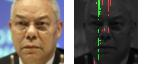

CORRECTLY CLASSIFIED
MAX ATR: 0.0076762754 MIN ATR: 0.0 THRESH: 0.003838137723505497


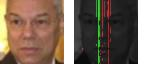

CORRECTLY CLASSIFIED
MAX ATR: 0.007897176 MIN ATR: 0.0 THRESH: 0.00394858792424202


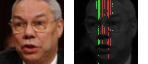

CORRECTLY CLASSIFIED
MAX ATR: 0.012550766 MIN ATR: 0.0 THRESH: 0.006275382824242115


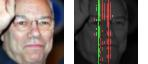

CORRECTLY CLASSIFIED
MAX ATR: 0.010437526 MIN ATR: 0.0 THRESH: 0.005218762904405594


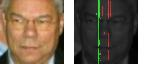

CORRECTLY CLASSIFIED
MAX ATR: 0.012378048 MIN ATR: 0.0 THRESH: 0.0061890240758657455


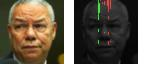

CORRECTLY CLASSIFIED
MAX ATR: 0.01093874 MIN ATR: 0.0 THRESH: 0.0054693701677024364


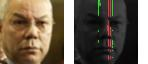

CORRECTLY CLASSIFIED
MAX ATR: 0.010173906 MIN ATR: 0.0 THRESH: 0.005086952820420265


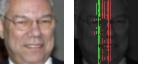

CORRECTLY CLASSIFIED
MAX ATR: 0.0108241 MIN ATR: 0.0 THRESH: 0.005412050057202578


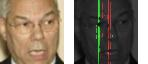

CORRECTLY CLASSIFIED
MAX ATR: 0.011100225 MIN ATR: 0.0 THRESH: 0.005550112575292587


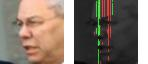

CORRECTLY CLASSIFIED
MAX ATR: 0.01115545 MIN ATR: 0.0 THRESH: 0.005577724892646074


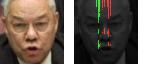

CORRECTLY CLASSIFIED
MAX ATR: 0.008891226 MIN ATR: 0.0 THRESH: 0.004445612896233797


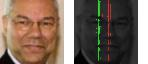

CORRECTLY CLASSIFIED
MAX ATR: 0.01181815 MIN ATR: 0.0 THRESH: 0.005909075029194355


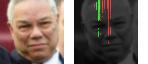

CORRECTLY CLASSIFIED
MAX ATR: 0.010216625 MIN ATR: 0.0 THRESH: 0.005108312703669071


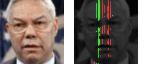

CORRECTLY CLASSIFIED
MAX ATR: 0.013241633 MIN ATR: 0.0 THRESH: 0.006620816420763731


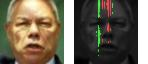

CORRECTLY CLASSIFIED
MAX ATR: 0.011265901 MIN ATR: 0.0 THRESH: 0.005632950458675623


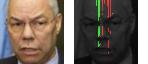

CORRECTLY CLASSIFIED
MAX ATR: 0.010658425 MIN ATR: 0.0 THRESH: 0.005329212639480829


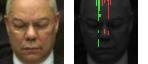

CORRECTLY CLASSIFIED
MAX ATR: 0.011542026 MIN ATR: 0.0 THRESH: 0.005771012976765633


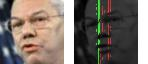

CORRECTLY CLASSIFIED
MAX ATR: 0.010106175 MIN ATR: 0.0 THRESH: 0.00505308760330081


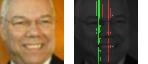

CORRECTLY CLASSIFIED
MAX ATR: 0.0090569 MIN ATR: 0.0 THRESH: 0.004528449848294258


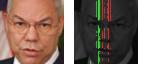

CORRECTLY CLASSIFIED
MAX ATR: 0.012094276 MIN ATR: 0.0 THRESH: 0.006047138012945652


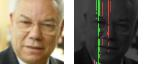

CORRECTLY CLASSIFIED
MAX ATR: 0.012315175 MIN ATR: 0.0 THRESH: 0.0061575872823596


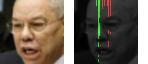

CORRECTLY CLASSIFIED
MAX ATR: 0.011597251 MIN ATR: 0.0 THRESH: 0.00579862529411912


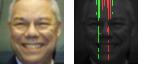

CORRECTLY CLASSIFIED
MAX ATR: 0.00869342 MIN ATR: 0.0 THRESH: 0.004346710164099932


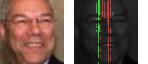

CORRECTLY CLASSIFIED
MAX ATR: 0.0121495 MIN ATR: 0.0 THRESH: 0.006074749864637852


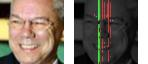

CORRECTLY CLASSIFIED
MAX ATR: 0.0121495 MIN ATR: 0.0 THRESH: 0.006074749864637852


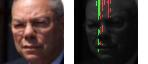

CORRECTLY CLASSIFIED
MAX ATR: 0.009902439 MIN ATR: 0.0 THRESH: 0.004951219540089369


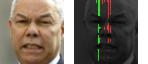

CORRECTLY CLASSIFIED
MAX ATR: 0.010305445 MIN ATR: 0.0 THRESH: 0.005152722354978323


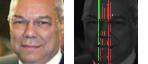

CORRECTLY CLASSIFIED
MAX ATR: 0.0101614 MIN ATR: 0.0 THRESH: 0.005080699920654297


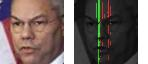

CORRECTLY CLASSIFIED
MAX ATR: 0.0075658257 MIN ATR: 0.0 THRESH: 0.0037829128559678793


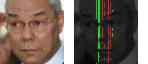

CORRECTLY CLASSIFIED
MAX ATR: 0.0101903 MIN ATR: 0.0 THRESH: 0.005095149856060743


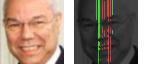

CORRECTLY CLASSIFIED
MAX ATR: 0.010420589 MIN ATR: 0.0 THRESH: 0.005210294388234615


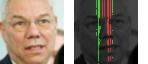

CORRECTLY CLASSIFIED
MAX ATR: 0.01292265 MIN ATR: 0.0 THRESH: 0.006461325101554394


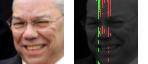

CORRECTLY CLASSIFIED
MAX ATR: 0.0099405 MIN ATR: 0.0 THRESH: 0.0049702501855790615


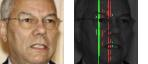

CORRECTLY CLASSIFIED
MAX ATR: 0.009885276 MIN ATR: 0.0 THRESH: 0.0049426378682255745


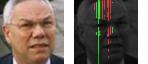

CORRECTLY CLASSIFIED
MAX ATR: 0.009960012 MIN ATR: 0.0 THRESH: 0.004980005789548159


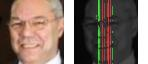

CORRECTLY CLASSIFIED
MAX ATR: 0.010936949 MIN ATR: 0.0 THRESH: 0.005468474701046944


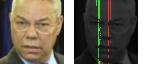

CORRECTLY CLASSIFIED
MAX ATR: 0.010547975 MIN ATR: 0.0 THRESH: 0.005273987539112568


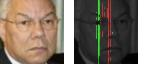

CORRECTLY CLASSIFIED
MAX ATR: 0.010650879 MIN ATR: 0.0 THRESH: 0.005325439386069775


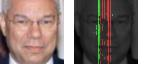

CORRECTLY CLASSIFIED
MAX ATR: 0.009333026 MIN ATR: 0.0 THRESH: 0.004666512832045555


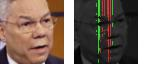

CORRECTLY CLASSIFIED
MAX ATR: 0.011597251 MIN ATR: 0.0 THRESH: 0.00579862529411912


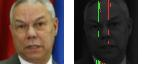

CORRECTLY CLASSIFIED
MAX ATR: 0.0090569 MIN ATR: 0.0 THRESH: 0.004528449848294258


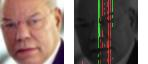

CORRECTLY CLASSIFIED
MAX ATR: 0.012608338 MIN ATR: 0.0 THRESH: 0.006304169073700905


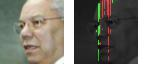

CORRECTLY CLASSIFIED
MAX ATR: 0.01093455 MIN ATR: 0.0 THRESH: 0.005467275157570839


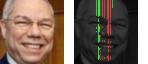

CORRECTLY CLASSIFIED
MAX ATR: 0.0076762754 MIN ATR: 0.0 THRESH: 0.003838137723505497


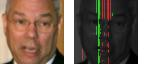

CORRECTLY CLASSIFIED
MAX ATR: 0.0098448675 MIN ATR: 0.0 THRESH: 0.004922433756291866


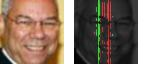

CORRECTLY CLASSIFIED
MAX ATR: 0.0103823 MIN ATR: 0.0 THRESH: 0.0051911501213908195


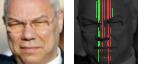

CORRECTLY CLASSIFIED
MAX ATR: 0.010216625 MIN ATR: 0.0 THRESH: 0.005108312703669071


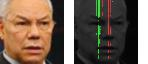

CORRECTLY CLASSIFIED
MAX ATR: 0.011572035 MIN ATR: 0.0 THRESH: 0.005786017514765263


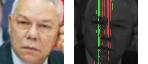

CORRECTLY CLASSIFIED
MAX ATR: 0.009995725 MIN ATR: 0.0 THRESH: 0.0049978625029325485


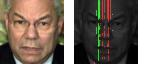

CORRECTLY CLASSIFIED
MAX ATR: 0.011652475 MIN ATR: 0.0 THRESH: 0.005826237611472607


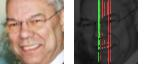

CORRECTLY CLASSIFIED
MAX ATR: 0.011456892 MIN ATR: 0.0 THRESH: 0.005728445947170258


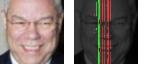

CORRECTLY CLASSIFIED
MAX ATR: 0.011399319 MIN ATR: 0.0 THRESH: 0.005699659697711468


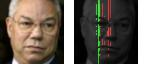

CORRECTLY CLASSIFIED
MAX ATR: 0.01270175 MIN ATR: 0.0 THRESH: 0.006350874900817871


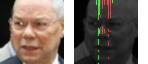

CORRECTLY CLASSIFIED
MAX ATR: 0.011169029 MIN ATR: 0.0 THRESH: 0.0055845146998763084


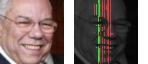

CORRECTLY CLASSIFIED
MAX ATR: 0.008891226 MIN ATR: 0.0 THRESH: 0.004445612896233797


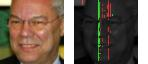

CORRECTLY CLASSIFIED
MAX ATR: 0.010879325 MIN ATR: 0.0 THRESH: 0.005439662374556065


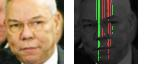

CORRECTLY CLASSIFIED
MAX ATR: 0.009269143 MIN ATR: 0.0 THRESH: 0.004634571727365255


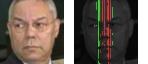

CORRECTLY CLASSIFIED
MAX ATR: 0.009112125 MIN ATR: 0.0 THRESH: 0.0045560626313090324


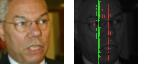

CORRECTLY CLASSIFIED
MAX ATR: 0.008175269 MIN ATR: 0.0 THRESH: 0.004087634384632111


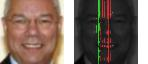

CORRECTLY CLASSIFIED
MAX ATR: 0.012204725 MIN ATR: 0.0 THRESH: 0.006102362647652626


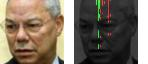

CORRECTLY CLASSIFIED
MAX ATR: 0.011100225 MIN ATR: 0.0 THRESH: 0.005550112575292587


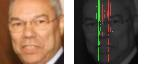

CORRECTLY CLASSIFIED
MAX ATR: 0.009995725 MIN ATR: 0.0 THRESH: 0.0049978625029325485


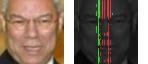

CORRECTLY CLASSIFIED
MAX ATR: 0.012977874 MIN ATR: 0.0 THRESH: 0.0064889369532465935


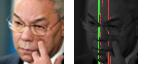

CORRECTLY CLASSIFIED
MAX ATR: 0.0117629245 MIN ATR: 0.0 THRESH: 0.005881462246179581


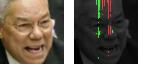

CORRECTLY CLASSIFIED
MAX ATR: 0.00938825 MIN ATR: 0.0 THRESH: 0.004694125149399042


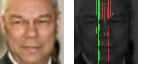

CORRECTLY CLASSIFIED
MAX ATR: 0.0094994325 MIN ATR: 0.0 THRESH: 0.004749716259539127


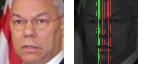

CORRECTLY CLASSIFIED
MAX ATR: 0.00983005 MIN ATR: 0.0 THRESH: 0.0049150250852108


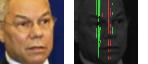

CORRECTLY CLASSIFIED
MAX ATR: 0.010881168 MIN ATR: 0.0 THRESH: 0.005440583918243647


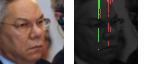

CORRECTLY CLASSIFIED
MAX ATR: 0.010478162 MIN ATR: 0.0 THRESH: 0.0052390811033546925


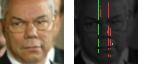

CORRECTLY CLASSIFIED
MAX ATR: 0.00983005 MIN ATR: 0.0 THRESH: 0.0049150250852108


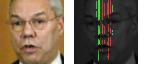

CORRECTLY CLASSIFIED
MAX ATR: 0.009553926 MIN ATR: 0.0 THRESH: 0.004776963032782078


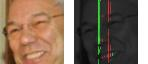

CORRECTLY CLASSIFIED
MAX ATR: 0.0097196 MIN ATR: 0.0 THRESH: 0.004859799984842539


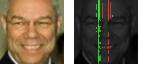

CORRECTLY CLASSIFIED
MAX ATR: 0.01115545 MIN ATR: 0.0 THRESH: 0.005577724892646074


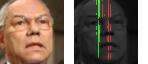

CORRECTLY CLASSIFIED
MAX ATR: 0.009664375 MIN ATR: 0.0 THRESH: 0.004832187667489052


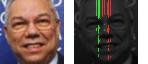

CORRECTLY CLASSIFIED
MAX ATR: 0.010050951 MIN ATR: 0.0 THRESH: 0.005025475285947323


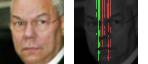

CORRECTLY CLASSIFIED
MAX ATR: 0.010363017 MIN ATR: 0.0 THRESH: 0.005181508604437113


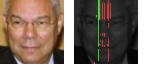

CORRECTLY CLASSIFIED
MAX ATR: 0.010050951 MIN ATR: 0.0 THRESH: 0.005025475285947323


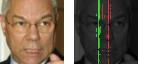

CORRECTLY CLASSIFIED
MAX ATR: 0.011542026 MIN ATR: 0.0 THRESH: 0.005771012976765633


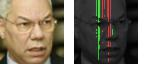

CORRECTLY CLASSIFIED
MAX ATR: 0.008891226 MIN ATR: 0.0 THRESH: 0.004445612896233797


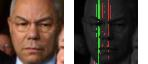

CORRECTLY CLASSIFIED
MAX ATR: 0.008405559 MIN ATR: 0.0 THRESH: 0.00420277938246727


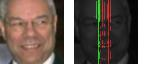

CORRECTLY CLASSIFIED
MAX ATR: 0.00960915 MIN ATR: 0.0 THRESH: 0.0048045748844742775


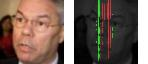

CORRECTLY CLASSIFIED
MAX ATR: 0.00850465 MIN ATR: 0.0 THRESH: 0.004252324812114239


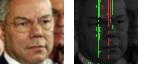

CORRECTLY CLASSIFIED
MAX ATR: 0.009664375 MIN ATR: 0.0 THRESH: 0.004832187667489052


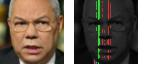

CORRECTLY CLASSIFIED
MAX ATR: 0.010106175 MIN ATR: 0.0 THRESH: 0.00505308760330081


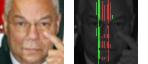

CORRECTLY CLASSIFIED
MAX ATR: 0.01049275 MIN ATR: 0.0 THRESH: 0.005246375221759081


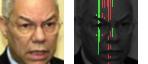

CORRECTLY CLASSIFIED
MAX ATR: 0.009038854 MIN ATR: 0.0 THRESH: 0.004519427195191383


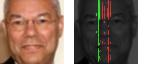

CORRECTLY CLASSIFIED
MAX ATR: 0.0103823 MIN ATR: 0.0 THRESH: 0.0051911501213908195


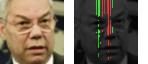

CORRECTLY CLASSIFIED
MAX ATR: 0.009333026 MIN ATR: 0.0 THRESH: 0.004666512832045555


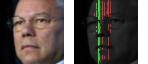

CORRECTLY CLASSIFIED
MAX ATR: 0.00960915 MIN ATR: 0.0 THRESH: 0.0048045748844742775


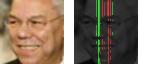

CORRECTLY CLASSIFIED
MAX ATR: 0.011597251 MIN ATR: 0.0 THRESH: 0.00579862529411912


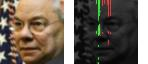

len cls: 40 SUPPORT: 40
len cls: 41 SUPPORT: 23
len cls: 27 SUPPORT: 12
len cls: 2 SUPPORT: 2
len cls: 2 SUPPORT: 2
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 2 SUPPORT: 1
len cls: 2 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
CLASS: 4
len cls: 13 SUPPORT: 10
len cls: 14 SUPPORT: 8
len cls: 14 SUPPORT: 7
len cls: 3 SUPPORT: 3
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
CLASS: 3
len cls: 33 SUPPORT: 16
len cls: 17 SUPPORT: 6
len cls: 5 SUPPORT: 4
len cls: 3 SUPPORT: 3
len cls: 2 SUPPORT: 2
len cls: 3 SUPPORT: 2
len cls: 4 SUPPORT: 2
len cls: 3 SUPPORT: 2
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
CLASS: 2
len cls: 182 SUPPORT: 171
Class: 2 , Rule:(neurons: [5, 6, 11, 1, 14, 2, 0, 4, 12] ,signature: [1, 1, 1, 1, 0, 0, 1, 0, 1] ), Support: 171
PIXELS IMPACTING PROPERTY (conductance) for 10 inputs satisfy the property
CORRECTLY CLASSIFIED
MAX ATR: 0.0073371455 MIN ATR: 0.0 THRESH: 0.0036685727536678314


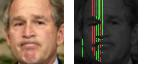

CORRECTLY CLASSIFIED
MAX ATR: 0.008446203 MIN ATR: 0.0 THRESH: 0.004223101306706667


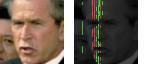

CORRECTLY CLASSIFIED
MAX ATR: 0.006162212 MIN ATR: 0.0 THRESH: 0.0030811061151325703


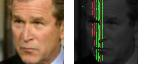

CORRECTLY CLASSIFIED
MAX ATR: 0.0078901965 MIN ATR: 0.0 THRESH: 0.0039450982585549355


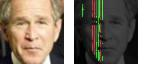

CORRECTLY CLASSIFIED
MAX ATR: 0.008684716 MIN ATR: 0.0 THRESH: 0.004342358093708754


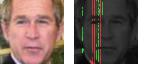

CORRECTLY CLASSIFIED
MAX ATR: 0.009772832 MIN ATR: 0.0 THRESH: 0.004886415787041187


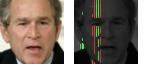

CORRECTLY CLASSIFIED
MAX ATR: 0.009419065 MIN ATR: 0.0 THRESH: 0.004709532484412193


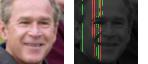

CORRECTLY CLASSIFIED
MAX ATR: 0.0074962815 MIN ATR: 0.0 THRESH: 0.003748140763491392


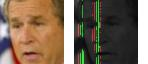

CORRECTLY CLASSIFIED
MAX ATR: 0.0067658066 MIN ATR: 0.0 THRESH: 0.003382903290912509


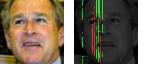

CORRECTLY CLASSIFIED
MAX ATR: 0.0074962815 MIN ATR: 0.0 THRESH: 0.003748140763491392


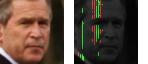

CORRECTLY CLASSIFIED
MAX ATR: 0.0068209637 MIN ATR: 0.0 THRESH: 0.003410481847822666


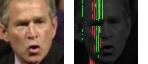

CORRECTLY CLASSIFIED
MAX ATR: 0.0070421845 MIN ATR: 0.0 THRESH: 0.0035210922360420227


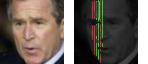

CORRECTLY CLASSIFIED
MAX ATR: 0.010568809 MIN ATR: 0.0 THRESH: 0.005284404382109642


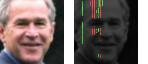

CORRECTLY CLASSIFIED
MAX ATR: 0.0079984255 MIN ATR: 0.0 THRESH: 0.003999212756752968


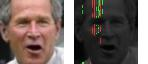

CORRECTLY CLASSIFIED
MAX ATR: 0.0070421845 MIN ATR: 0.0 THRESH: 0.0035210922360420227


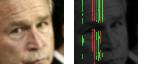

CORRECTLY CLASSIFIED
MAX ATR: 0.0079625575 MIN ATR: 0.0 THRESH: 0.003981278743594885


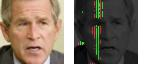

CORRECTLY CLASSIFIED
MAX ATR: 0.007500061 MIN ATR: 0.0 THRESH: 0.003750030416995287


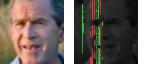

CORRECTLY CLASSIFIED
MAX ATR: 0.007152794 MIN ATR: 0.0 THRESH: 0.0035763969644904137


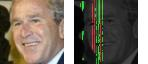

CORRECTLY CLASSIFIED
MAX ATR: 0.0071774516 MIN ATR: 0.0 THRESH: 0.0035887258127331734


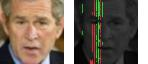

CORRECTLY CLASSIFIED
MAX ATR: 0.0068209637 MIN ATR: 0.0 THRESH: 0.003410481847822666


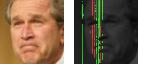

CORRECTLY CLASSIFIED
MAX ATR: 0.007521496 MIN ATR: 0.0 THRESH: 0.003760748077183962


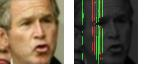

CORRECTLY CLASSIFIED
MAX ATR: 0.008895109 MIN ATR: 0.0 THRESH: 0.00444755470380187


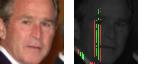

CORRECTLY CLASSIFIED
MAX ATR: 0.0066354647 MIN ATR: 0.0 THRESH: 0.0033177323639392853


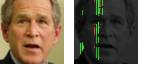

CORRECTLY CLASSIFIED
MAX ATR: 0.011276344 MIN ATR: 0.0 THRESH: 0.005638171918690205


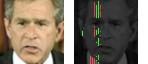

CORRECTLY CLASSIFIED
MAX ATR: 0.0071195746 MIN ATR: 0.0 THRESH: 0.003559787292033434


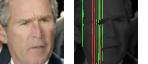

CORRECTLY CLASSIFIED
MAX ATR: 0.006157303 MIN ATR: 0.0 THRESH: 0.003078651614487171


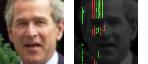

CORRECTLY CLASSIFIED
MAX ATR: 0.0075952355 MIN ATR: 0.0 THRESH: 0.0037976177409291267


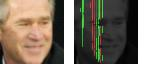

CORRECTLY CLASSIFIED
MAX ATR: 0.006850669 MIN ATR: 0.0 THRESH: 0.003425334580242634


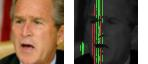

CORRECTLY CLASSIFIED
MAX ATR: 0.007915551 MIN ATR: 0.0 THRESH: 0.003957775421440601


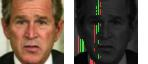

CORRECTLY CLASSIFIED
MAX ATR: 0.0072080162 MIN ATR: 0.0 THRESH: 0.0036040081176906824


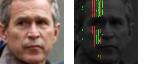

CORRECTLY CLASSIFIED
MAX ATR: 0.007163795 MIN ATR: 0.0 THRESH: 0.0035818975884467363


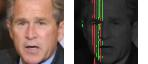

CORRECTLY CLASSIFIED
MAX ATR: 0.0070753535 MIN ATR: 0.0 THRESH: 0.003537676762789488


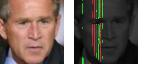

CORRECTLY CLASSIFIED
MAX ATR: 0.007915551 MIN ATR: 0.0 THRESH: 0.003957775421440601


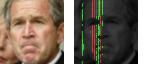

CORRECTLY CLASSIFIED
MAX ATR: 0.0064459983 MIN ATR: 0.0 THRESH: 0.0032229991629719734


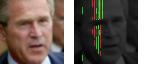

CORRECTLY CLASSIFIED
MAX ATR: 0.009527104 MIN ATR: 0.0 THRESH: 0.004763551987707615


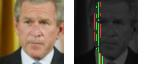

CORRECTLY CLASSIFIED
MAX ATR: 0.007429121 MIN ATR: 0.0 THRESH: 0.003714560531079769


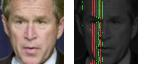

CORRECTLY CLASSIFIED
MAX ATR: 0.009330622 MIN ATR: 0.0 THRESH: 0.004665310960263014


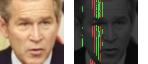

CORRECTLY CLASSIFIED
MAX ATR: 0.010082378 MIN ATR: 0.0 THRESH: 0.0050411890260875225


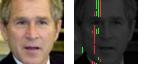

CORRECTLY CLASSIFIED
MAX ATR: 0.007963937 MIN ATR: 0.0 THRESH: 0.003981968387961388


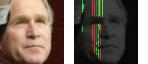

CORRECTLY CLASSIFIED
MAX ATR: 0.0062838346 MIN ATR: 0.0 THRESH: 0.0031419172883033752


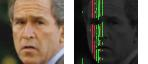

CORRECTLY CLASSIFIED
MAX ATR: 0.0065997434 MIN ATR: 0.0 THRESH: 0.0032998716924339533


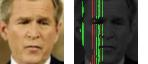

CORRECTLY CLASSIFIED
MAX ATR: 0.007915551 MIN ATR: 0.0 THRESH: 0.003957775421440601


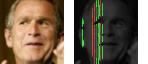

CORRECTLY CLASSIFIED
MAX ATR: 0.008644038 MIN ATR: 0.0 THRESH: 0.004322018940001726


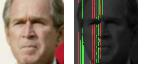

CORRECTLY CLASSIFIED
MAX ATR: 0.0074962815 MIN ATR: 0.0 THRESH: 0.003748140763491392


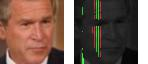

CORRECTLY CLASSIFIED
MAX ATR: 0.0065995976 MIN ATR: 0.0 THRESH: 0.0032997988164424896


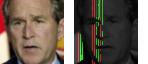

CORRECTLY CLASSIFIED
MAX ATR: 0.006102492 MIN ATR: 0.0 THRESH: 0.003051246050745249


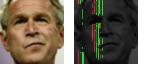

CORRECTLY CLASSIFIED
MAX ATR: 0.007521496 MIN ATR: 0.0 THRESH: 0.003760748077183962


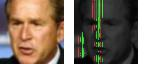

CORRECTLY CLASSIFIED
MAX ATR: 0.006636614 MIN ATR: 0.0 THRESH: 0.003318306989967823


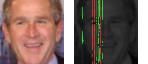

CORRECTLY CLASSIFIED
MAX ATR: 0.007606005 MIN ATR: 0.0 THRESH: 0.0038030024152249098


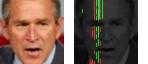

CORRECTLY CLASSIFIED
MAX ATR: 0.009463284 MIN ATR: 0.0 THRESH: 0.004731642082333565


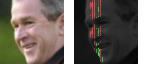

CORRECTLY CLASSIFIED
MAX ATR: 0.007163795 MIN ATR: 0.0 THRESH: 0.0035818975884467363


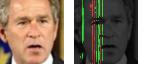

CORRECTLY CLASSIFIED
MAX ATR: 0.006633144 MIN ATR: 0.0 THRESH: 0.0033165719360113144


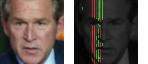

CORRECTLY CLASSIFIED
MAX ATR: 0.0072634052 MIN ATR: 0.0 THRESH: 0.0036317026242613792


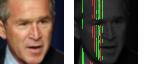

CORRECTLY CLASSIFIED
MAX ATR: 0.008505281 MIN ATR: 0.0 THRESH: 0.004252640530467033


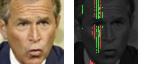

CORRECTLY CLASSIFIED
MAX ATR: 0.008310878 MIN ATR: 0.0 THRESH: 0.004155438859015703


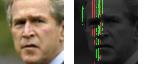

CORRECTLY CLASSIFIED
MAX ATR: 0.0073848995 MIN ATR: 0.0 THRESH: 0.0036924497690051794


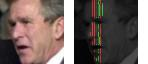

CORRECTLY CLASSIFIED
MAX ATR: 0.009021075 MIN ATR: 0.0 THRESH: 0.004510537721216679


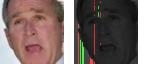

CORRECTLY CLASSIFIED
MAX ATR: 0.009684389 MIN ATR: 0.0 THRESH: 0.004842194728553295


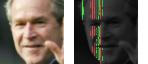

CORRECTLY CLASSIFIED
MAX ATR: 0.0065637296 MIN ATR: 0.0 THRESH: 0.0032818648032844067


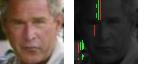

CORRECTLY CLASSIFIED
MAX ATR: 0.008679905 MIN ATR: 0.0 THRESH: 0.004339952487498522


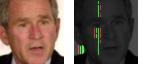

CORRECTLY CLASSIFIED
MAX ATR: 0.007782889 MIN ATR: 0.0 THRESH: 0.003891444532200694


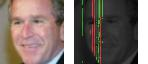

CORRECTLY CLASSIFIED
MAX ATR: 0.007321 MIN ATR: 0.0 THRESH: 0.0036605000495910645


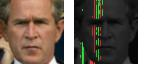

CORRECTLY CLASSIFIED
MAX ATR: 0.008996298 MIN ATR: 0.0 THRESH: 0.004498148802667856


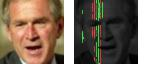

CORRECTLY CLASSIFIED
MAX ATR: 0.007152794 MIN ATR: 0.0 THRESH: 0.0035763969644904137


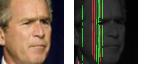

CORRECTLY CLASSIFIED
MAX ATR: 0.008249497 MIN ATR: 0.0 THRESH: 0.004124748520553112


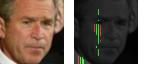

CORRECTLY CLASSIFIED
MAX ATR: 0.010259262 MIN ATR: 0.0 THRESH: 0.005129631143063307


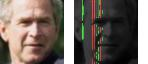

CORRECTLY CLASSIFIED
MAX ATR: 0.008679905 MIN ATR: 0.0 THRESH: 0.004339952487498522


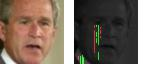

CORRECTLY CLASSIFIED
MAX ATR: 0.010922576 MIN ATR: 0.0 THRESH: 0.005461288150399923


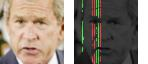

CORRECTLY CLASSIFIED
MAX ATR: 0.0060098222 MIN ATR: 0.0 THRESH: 0.003004911122843623


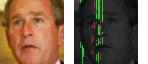

CORRECTLY CLASSIFIED
MAX ATR: 0.0079625575 MIN ATR: 0.0 THRESH: 0.003981278743594885


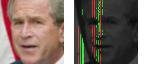

CORRECTLY CLASSIFIED
MAX ATR: 0.008578866 MIN ATR: 0.0 THRESH: 0.004289432894438505


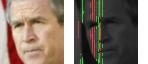

CORRECTLY CLASSIFIED
MAX ATR: 0.005093167 MIN ATR: 0.0 THRESH: 0.0025465835351496935


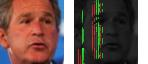

CORRECTLY CLASSIFIED
MAX ATR: 0.005346161 MIN ATR: 0.0 THRESH: 0.002673080423846841


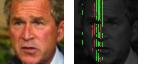

CORRECTLY CLASSIFIED
MAX ATR: 0.007946011 MIN ATR: 0.0 THRESH: 0.003973005339503288


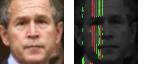

CORRECTLY CLASSIFIED
MAX ATR: 0.009038579 MIN ATR: 0.0 THRESH: 0.00451928935945034


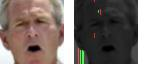

CORRECTLY CLASSIFIED
MAX ATR: 0.009419065 MIN ATR: 0.0 THRESH: 0.004709532484412193


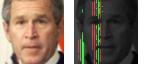

CORRECTLY CLASSIFIED
MAX ATR: 0.006784094 MIN ATR: 0.0 THRESH: 0.0033920470159500837


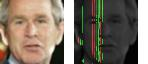

CORRECTLY CLASSIFIED
MAX ATR: 0.008679905 MIN ATR: 0.0 THRESH: 0.004339952487498522


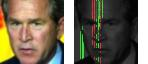

CORRECTLY CLASSIFIED
MAX ATR: 0.00860817 MIN ATR: 0.0 THRESH: 0.004304084926843643


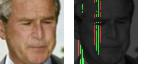

CORRECTLY CLASSIFIED
MAX ATR: 0.007316945 MIN ATR: 0.0 THRESH: 0.0036584725603461266


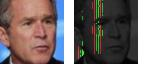

CORRECTLY CLASSIFIED
MAX ATR: 0.007226534 MIN ATR: 0.0 THRESH: 0.003613267093896866


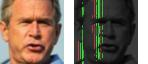

CORRECTLY CLASSIFIED
MAX ATR: 0.0071351924 MIN ATR: 0.0 THRESH: 0.003567596198990941


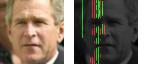

CORRECTLY CLASSIFIED
MAX ATR: 0.0075680166 MIN ATR: 0.0 THRESH: 0.0037840083241462708


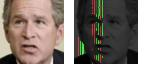

CORRECTLY CLASSIFIED
MAX ATR: 0.0076502254 MIN ATR: 0.0 THRESH: 0.003825112711638212


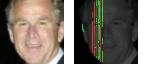

CORRECTLY CLASSIFIED
MAX ATR: 0.008037676 MIN ATR: 0.0 THRESH: 0.0040188380517065525


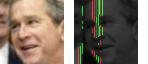

CORRECTLY CLASSIFIED
MAX ATR: 0.009595947 MIN ATR: 0.0 THRESH: 0.004797973670065403


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in less


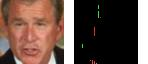

CORRECTLY CLASSIFIED
MAX ATR: 0.010436146 MIN ATR: 0.0 THRESH: 0.005218072794377804


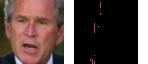

CORRECTLY CLASSIFIED
MAX ATR: 0.0068947044 MIN ATR: 0.0 THRESH: 0.003447352210059762


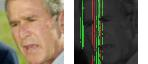

CORRECTLY CLASSIFIED
MAX ATR: 0.00914618 MIN ATR: 0.0 THRESH: 0.004573090001940727


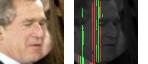

CORRECTLY CLASSIFIED
MAX ATR: 0.005677992 MIN ATR: 0.0 THRESH: 0.0028389960061758757


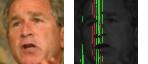

CORRECTLY CLASSIFIED
MAX ATR: 0.008092435 MIN ATR: 0.0 THRESH: 0.004046217538416386


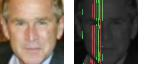

CORRECTLY CLASSIFIED
MAX ATR: 0.009684389 MIN ATR: 0.0 THRESH: 0.004842194728553295


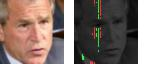

CORRECTLY CLASSIFIED
MAX ATR: 0.009684389 MIN ATR: 0.0 THRESH: 0.004842194728553295


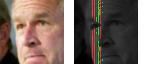

CORRECTLY CLASSIFIED
MAX ATR: 0.011232124 MIN ATR: 0.0 THRESH: 0.005616061855107546


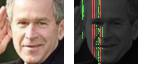

CORRECTLY CLASSIFIED
MAX ATR: 0.010436146 MIN ATR: 0.0 THRESH: 0.005218072794377804


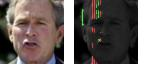

CORRECTLY CLASSIFIED
MAX ATR: 0.007152794 MIN ATR: 0.0 THRESH: 0.0035763969644904137


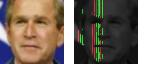

CORRECTLY CLASSIFIED
MAX ATR: 0.008859241 MIN ATR: 0.0 THRESH: 0.004429620690643787


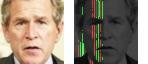

CORRECTLY CLASSIFIED
MAX ATR: 0.009074446 MIN ATR: 0.0 THRESH: 0.004537222906947136


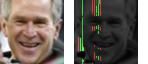

CORRECTLY CLASSIFIED
MAX ATR: 0.007152794 MIN ATR: 0.0 THRESH: 0.0035763969644904137


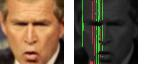

CORRECTLY CLASSIFIED
MAX ATR: 0.005493642 MIN ATR: 0.0 THRESH: 0.002746820915490389


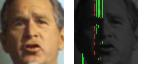

CORRECTLY CLASSIFIED
MAX ATR: 0.0072080162 MIN ATR: 0.0 THRESH: 0.0036040081176906824


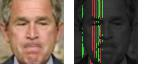

CORRECTLY CLASSIFIED
MAX ATR: 0.0064562596 MIN ATR: 0.0 THRESH: 0.00322812981903553


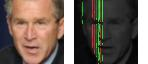

CORRECTLY CLASSIFIED
MAX ATR: 0.007931083 MIN ATR: 0.0 THRESH: 0.00396554172039032


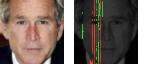

CORRECTLY CLASSIFIED
MAX ATR: 0.009486563 MIN ATR: 0.0 THRESH: 0.004743281286209822


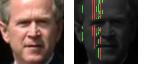

CORRECTLY CLASSIFIED
MAX ATR: 0.010657251 MIN ATR: 0.0 THRESH: 0.005328625440597534


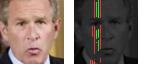

CORRECTLY CLASSIFIED
MAX ATR: 0.00807016 MIN ATR: 0.0 THRESH: 0.004035079851746559


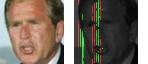

CORRECTLY CLASSIFIED
MAX ATR: 0.008180876 MIN ATR: 0.0 THRESH: 0.0040904381312429905


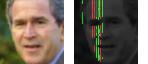

CORRECTLY CLASSIFIED
MAX ATR: 0.007030006 MIN ATR: 0.0 THRESH: 0.003515003016218543


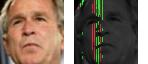

CORRECTLY CLASSIFIED
MAX ATR: 0.00875575 MIN ATR: 0.0 THRESH: 0.0043778750114142895


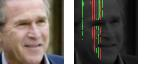

CORRECTLY CLASSIFIED
MAX ATR: 0.008225098 MIN ATR: 0.0 THRESH: 0.004112549126148224


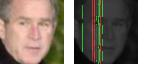

CORRECTLY CLASSIFIED
MAX ATR: 0.006784094 MIN ATR: 0.0 THRESH: 0.0033920470159500837


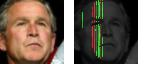

CORRECTLY CLASSIFIED
MAX ATR: 0.007606005 MIN ATR: 0.0 THRESH: 0.0038030024152249098


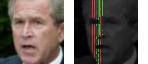

CORRECTLY CLASSIFIED
MAX ATR: 0.010480367 MIN ATR: 0.0 THRESH: 0.00524018332362175


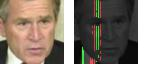

CORRECTLY CLASSIFIED
MAX ATR: 0.010480367 MIN ATR: 0.0 THRESH: 0.00524018332362175


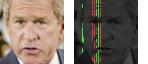

CORRECTLY CLASSIFIED
MAX ATR: 0.006857834 MIN ATR: 0.0 THRESH: 0.0034289169125258923


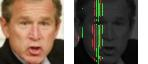

CORRECTLY CLASSIFIED
MAX ATR: 0.0068947044 MIN ATR: 0.0 THRESH: 0.003447352210059762


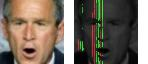

CORRECTLY CLASSIFIED
MAX ATR: 0.0068209637 MIN ATR: 0.0 THRESH: 0.003410481847822666


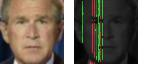

CORRECTLY CLASSIFIED
MAX ATR: 0.007561784 MIN ATR: 0.0 THRESH: 0.0037808918859809637


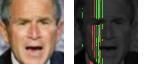

CORRECTLY CLASSIFIED
MAX ATR: 0.007340679 MIN ATR: 0.0 THRESH: 0.003670339472591877


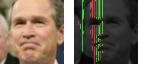

CORRECTLY CLASSIFIED
MAX ATR: 0.011232124 MIN ATR: 0.0 THRESH: 0.005616061855107546


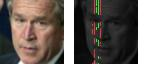

CORRECTLY CLASSIFIED
MAX ATR: 0.008003993 MIN ATR: 0.0 THRESH: 0.0040019964799284935


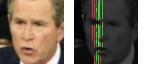

CORRECTLY CLASSIFIED
MAX ATR: 0.0092864 MIN ATR: 0.0 THRESH: 0.0046431999653577805


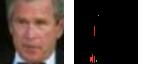

CORRECTLY CLASSIFIED
MAX ATR: 0.0068148007 MIN ATR: 0.0 THRESH: 0.003407400334253907


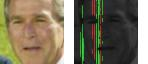

CORRECTLY CLASSIFIED
MAX ATR: 0.0067103533 MIN ATR: 0.0 THRESH: 0.003355176653712988


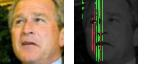

CORRECTLY CLASSIFIED
MAX ATR: 0.006743067 MIN ATR: 0.0 THRESH: 0.0033715334720909595


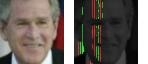

CORRECTLY CLASSIFIED
MAX ATR: 0.0071774516 MIN ATR: 0.0 THRESH: 0.0035887258127331734


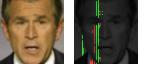

CORRECTLY CLASSIFIED
MAX ATR: 0.0066032545 MIN ATR: 0.0 THRESH: 0.0033016272354871035


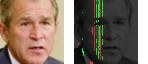

CORRECTLY CLASSIFIED
MAX ATR: 0.0083577605 MIN ATR: 0.0 THRESH: 0.004178880248218775


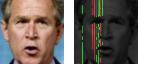

CORRECTLY CLASSIFIED
MAX ATR: 0.008500568 MIN ATR: 0.0 THRESH: 0.004250283818691969


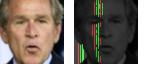

CORRECTLY CLASSIFIED
MAX ATR: 0.008505281 MIN ATR: 0.0 THRESH: 0.004252640530467033


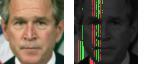

CORRECTLY CLASSIFIED
MAX ATR: 0.009551726 MIN ATR: 0.0 THRESH: 0.004775863140821457


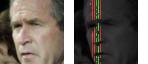

CORRECTLY CLASSIFIED
MAX ATR: 0.008888412 MIN ATR: 0.0 THRESH: 0.00444420613348484


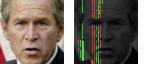

CORRECTLY CLASSIFIED
MAX ATR: 0.00875575 MIN ATR: 0.0 THRESH: 0.0043778750114142895


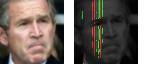

CORRECTLY CLASSIFIED
MAX ATR: 0.009110313 MIN ATR: 0.0 THRESH: 0.004555156454443932


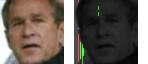

CORRECTLY CLASSIFIED
MAX ATR: 0.006367818 MIN ATR: 0.0 THRESH: 0.0031839089933782816


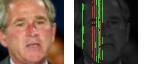

CORRECTLY CLASSIFIED
MAX ATR: 0.009153739 MIN ATR: 0.0 THRESH: 0.004576869308948517


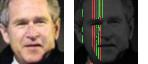

CORRECTLY CLASSIFIED
MAX ATR: 0.006588923 MIN ATR: 0.0 THRESH: 0.0032944614067673683


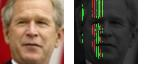

CORRECTLY CLASSIFIED
MAX ATR: 0.008106027 MIN ATR: 0.0 THRESH: 0.004053013399243355


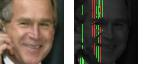

CORRECTLY CLASSIFIED
MAX ATR: 0.007738668 MIN ATR: 0.0 THRESH: 0.003869334002956748


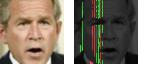

CORRECTLY CLASSIFIED
MAX ATR: 0.007738668 MIN ATR: 0.0 THRESH: 0.003869334002956748


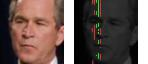

CORRECTLY CLASSIFIED
MAX ATR: 0.00494059 MIN ATR: 0.0 THRESH: 0.0024702949449419975


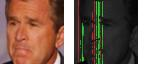

CORRECTLY CLASSIFIED
MAX ATR: 0.007163795 MIN ATR: 0.0 THRESH: 0.0035818975884467363


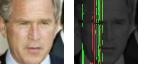

CORRECTLY CLASSIFIED
MAX ATR: 0.0079625575 MIN ATR: 0.0 THRESH: 0.003981278743594885


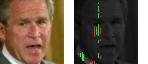

CORRECTLY CLASSIFIED
MAX ATR: 0.006854249 MIN ATR: 0.0 THRESH: 0.0034271245822310448


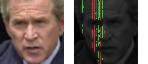

CORRECTLY CLASSIFIED
MAX ATR: 0.006721585 MIN ATR: 0.0 THRESH: 0.0033607925288379192


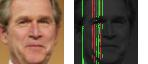

CORRECTLY CLASSIFIED
MAX ATR: 0.00875164 MIN ATR: 0.0 THRESH: 0.0043758200481534


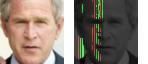

CORRECTLY CLASSIFIED
MAX ATR: 0.007606005 MIN ATR: 0.0 THRESH: 0.0038030024152249098


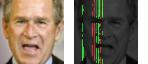

CORRECTLY CLASSIFIED
MAX ATR: 0.007890822 MIN ATR: 0.0 THRESH: 0.003945411182940006


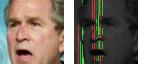

CORRECTLY CLASSIFIED
MAX ATR: 0.010038156 MIN ATR: 0.0 THRESH: 0.005019078031182289


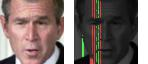

CORRECTLY CLASSIFIED
MAX ATR: 0.008003993 MIN ATR: 0.0 THRESH: 0.0040019964799284935


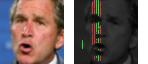

CORRECTLY CLASSIFIED
MAX ATR: 0.007854955 MIN ATR: 0.0 THRESH: 0.003927477635443211


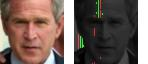

CORRECTLY CLASSIFIED
MAX ATR: 0.009772832 MIN ATR: 0.0 THRESH: 0.004886415787041187


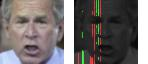

CORRECTLY CLASSIFIED
MAX ATR: 0.00875575 MIN ATR: 0.0 THRESH: 0.0043778750114142895


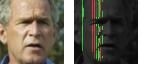

CORRECTLY CLASSIFIED
MAX ATR: 0.009330622 MIN ATR: 0.0 THRESH: 0.004665310960263014


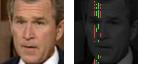

CORRECTLY CLASSIFIED
MAX ATR: 0.007639751 MIN ATR: 0.0 THRESH: 0.003819875419139862


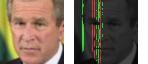

CORRECTLY CLASSIFIED
MAX ATR: 0.007782889 MIN ATR: 0.0 THRESH: 0.003891444532200694


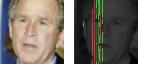

CORRECTLY CLASSIFIED
MAX ATR: 0.006102492 MIN ATR: 0.0 THRESH: 0.003051246050745249


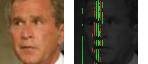

CORRECTLY CLASSIFIED
MAX ATR: 0.007915551 MIN ATR: 0.0 THRESH: 0.003957775421440601


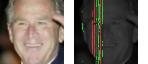

CORRECTLY CLASSIFIED
MAX ATR: 0.0066354647 MIN ATR: 0.0 THRESH: 0.0033177323639392853


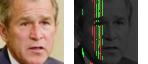

CORRECTLY CLASSIFIED
MAX ATR: 0.009197959 MIN ATR: 0.0 THRESH: 0.004598979372531176


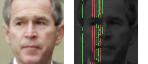

CORRECTLY CLASSIFIED
MAX ATR: 0.0068947044 MIN ATR: 0.0 THRESH: 0.003447352210059762


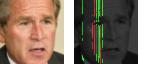

CORRECTLY CLASSIFIED
MAX ATR: 0.00807016 MIN ATR: 0.0 THRESH: 0.004035079851746559


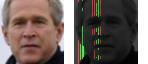

CORRECTLY CLASSIFIED
MAX ATR: 0.009021075 MIN ATR: 0.0 THRESH: 0.004510537721216679


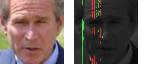

CORRECTLY CLASSIFIED
MAX ATR: 0.0077433055 MIN ATR: 0.0 THRESH: 0.003871652763336897


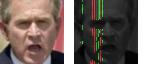

CORRECTLY CLASSIFIED
MAX ATR: 0.007926691 MIN ATR: 0.0 THRESH: 0.0039633456617593765


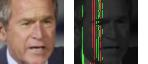

CORRECTLY CLASSIFIED
MAX ATR: 0.006588923 MIN ATR: 0.0 THRESH: 0.0032944614067673683


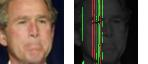

CORRECTLY CLASSIFIED
MAX ATR: 0.00710174 MIN ATR: 0.0 THRESH: 0.0035508701112121344


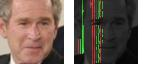

CORRECTLY CLASSIFIED
MAX ATR: 0.0061216713 MIN ATR: 0.0 THRESH: 0.0030608356464654207


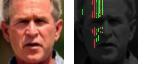

CORRECTLY CLASSIFIED
MAX ATR: 0.0067472244 MIN ATR: 0.0 THRESH: 0.0033736121840775013


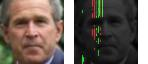

CORRECTLY CLASSIFIED
MAX ATR: 0.007711486 MIN ATR: 0.0 THRESH: 0.0038557429797947407


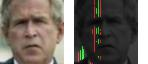

CORRECTLY CLASSIFIED
MAX ATR: 0.007069789 MIN ATR: 0.0 THRESH: 0.003534894436597824


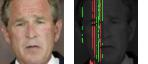

len cls: 111 SUPPORT: 101
Class: 2 , Rule:(neurons: [5, 6, 11, 1, 14, 2, 0, 4] ,signature: [1, 1, 1, 1, 0, 1, 1, 0] ), Support: 101
PIXELS IMPACTING PROPERTY (conductance) for 10 inputs satisfy the property
CORRECTLY CLASSIFIED
MAX ATR: 0.006162671 MIN ATR: 0.0 THRESH: 0.0030813354533165693


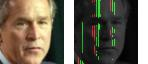

CORRECTLY CLASSIFIED
MAX ATR: 0.0063418183 MIN ATR: 0.0 THRESH: 0.0031709091272205114


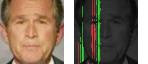

CORRECTLY CLASSIFIED
MAX ATR: 0.008570676 MIN ATR: 0.0 THRESH: 0.004285337869077921


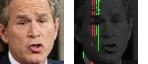

CORRECTLY CLASSIFIED
MAX ATR: 0.010702243 MIN ATR: 0.0 THRESH: 0.005351121537387371


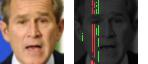

CORRECTLY CLASSIFIED
MAX ATR: 0.0092811985 MIN ATR: 0.0 THRESH: 0.004640599247068167


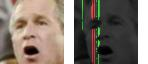

CORRECTLY CLASSIFIED
MAX ATR: 0.0070608165 MIN ATR: 0.0 THRESH: 0.0035304082557559013


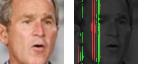

CORRECTLY CLASSIFIED
MAX ATR: 0.006980197 MIN ATR: 0.0 THRESH: 0.0034900985192507505


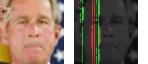

CORRECTLY CLASSIFIED
MAX ATR: 0.0053744223 MIN ATR: 0.0 THRESH: 0.002687211148440838


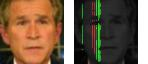

CORRECTLY CLASSIFIED
MAX ATR: 0.0077636885 MIN ATR: 0.0 THRESH: 0.003881844226270914


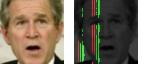

CORRECTLY CLASSIFIED
MAX ATR: 0.0069150897 MIN ATR: 0.0 THRESH: 0.0034575448371469975


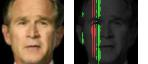

CORRECTLY CLASSIFIED
MAX ATR: 0.010924282 MIN ATR: 0.0 THRESH: 0.005462140776216984


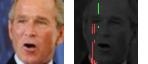

CORRECTLY CLASSIFIED
MAX ATR: 0.007941755 MIN ATR: 0.0 THRESH: 0.003970877267420292


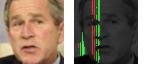

CORRECTLY CLASSIFIED
MAX ATR: 0.008570676 MIN ATR: 0.0 THRESH: 0.004285337869077921


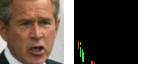

CORRECTLY CLASSIFIED
MAX ATR: 0.008938925 MIN ATR: 0.0 THRESH: 0.0044694626703858376


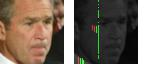

CORRECTLY CLASSIFIED
MAX ATR: 0.011013096 MIN ATR: 0.0 THRESH: 0.005506548099219799


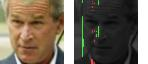

CORRECTLY CLASSIFIED
MAX ATR: 0.009192384 MIN ATR: 0.0 THRESH: 0.0045961919240653515


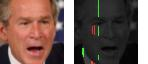

CORRECTLY CLASSIFIED
MAX ATR: 0.007904562 MIN ATR: 0.0 THRESH: 0.003952281083911657


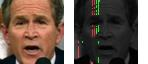

CORRECTLY CLASSIFIED
MAX ATR: 0.010302575 MIN ATR: 0.0 THRESH: 0.005151287652552128


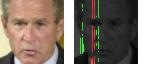

CORRECTLY CLASSIFIED
MAX ATR: 0.007282855 MIN ATR: 0.0 THRESH: 0.003641427494585514


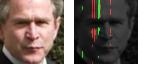

CORRECTLY CLASSIFIED
MAX ATR: 0.009149705 MIN ATR: 0.0 THRESH: 0.004574852529913187


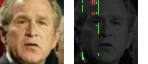

CORRECTLY CLASSIFIED
MAX ATR: 0.006485136 MIN ATR: 0.0 THRESH: 0.003242568112909794


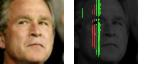

CORRECTLY CLASSIFIED
MAX ATR: 0.006661148 MIN ATR: 0.0 THRESH: 0.003330573905259371


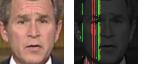

CORRECTLY CLASSIFIED
MAX ATR: 0.0069150897 MIN ATR: 0.0 THRESH: 0.0034575448371469975


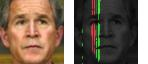

CORRECTLY CLASSIFIED
MAX ATR: 0.0063947015 MIN ATR: 0.0 THRESH: 0.003197350772097707


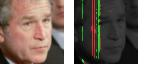

CORRECTLY CLASSIFIED
MAX ATR: 0.008511567 MIN ATR: 0.0 THRESH: 0.004255783278495073


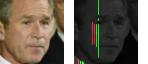

CORRECTLY CLASSIFIED
MAX ATR: 0.0074160774 MIN ATR: 0.0 THRESH: 0.0037080387119203806


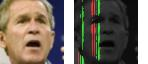

CORRECTLY CLASSIFIED
MAX ATR: 0.006339158 MIN ATR: 0.0 THRESH: 0.003169578965753317


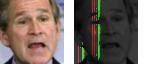

CORRECTLY CLASSIFIED
MAX ATR: 0.007638116 MIN ATR: 0.0 THRESH: 0.0038190579507499933


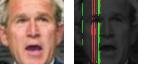

CORRECTLY CLASSIFIED
MAX ATR: 0.0049444684 MIN ATR: 0.0 THRESH: 0.0024722341913729906


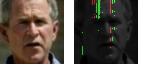

CORRECTLY CLASSIFIED
MAX ATR: 0.0074160774 MIN ATR: 0.0 THRESH: 0.0037080387119203806


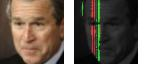

CORRECTLY CLASSIFIED
MAX ATR: 0.0064816116 MIN ATR: 0.0 THRESH: 0.0032408058177679777


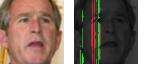

CORRECTLY CLASSIFIED
MAX ATR: 0.007460485 MIN ATR: 0.0 THRESH: 0.003730242606252432


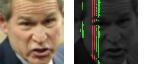

CORRECTLY CLASSIFIED
MAX ATR: 0.008511567 MIN ATR: 0.0 THRESH: 0.004255783278495073


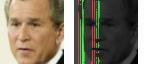

CORRECTLY CLASSIFIED
MAX ATR: 0.008082192 MIN ATR: 0.0 THRESH: 0.004041096195578575


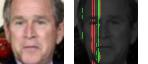

CORRECTLY CLASSIFIED
MAX ATR: 0.0063418183 MIN ATR: 0.0 THRESH: 0.0031709091272205114


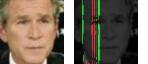

CORRECTLY CLASSIFIED
MAX ATR: 0.008352254 MIN ATR: 0.0 THRESH: 0.004176126793026924


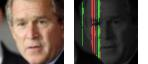

CORRECTLY CLASSIFIED
MAX ATR: 0.008615084 MIN ATR: 0.0 THRESH: 0.004307541996240616


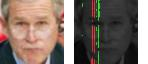

CORRECTLY CLASSIFIED
MAX ATR: 0.0073272623 MIN ATR: 0.0 THRESH: 0.0036636311560869217


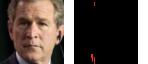

CORRECTLY CLASSIFIED
MAX ATR: 0.009527445 MIN ATR: 0.0 THRESH: 0.0047637224197387695


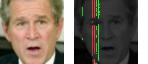

CORRECTLY CLASSIFIED
MAX ATR: 0.0074160774 MIN ATR: 0.0 THRESH: 0.0037080387119203806


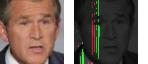

CORRECTLY CLASSIFIED
MAX ATR: 0.008048594 MIN ATR: 0.0 THRESH: 0.004024296998977661


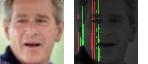

CORRECTLY CLASSIFIED
MAX ATR: 0.0055535696 MIN ATR: 0.0 THRESH: 0.00277678482234478


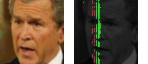

CORRECTLY CLASSIFIED
MAX ATR: 0.005410252 MIN ATR: 0.0 THRESH: 0.002705126069486141


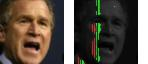

CORRECTLY CLASSIFIED
MAX ATR: 0.007771339 MIN ATR: 0.0 THRESH: 0.0038856694009155035


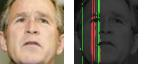

CORRECTLY CLASSIFIED
MAX ATR: 0.005373325 MIN ATR: 0.0 THRESH: 0.0026866625994443893


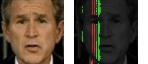

CORRECTLY CLASSIFIED
MAX ATR: 0.006413477 MIN ATR: 0.0 THRESH: 0.003206738503649831


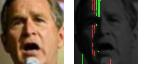

CORRECTLY CLASSIFIED
MAX ATR: 0.0064391093 MIN ATR: 0.0 THRESH: 0.003219554666429758


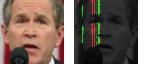

CORRECTLY CLASSIFIED
MAX ATR: 0.0070158103 MIN ATR: 0.0 THRESH: 0.003507905174046755


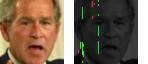

CORRECTLY CLASSIFIED
MAX ATR: 0.0081266 MIN ATR: 0.0 THRESH: 0.004063299857079983


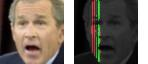

CORRECTLY CLASSIFIED
MAX ATR: 0.0070608165 MIN ATR: 0.0 THRESH: 0.0035304082557559013


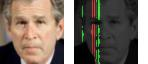

CORRECTLY CLASSIFIED
MAX ATR: 0.007265103 MIN ATR: 0.0 THRESH: 0.0036325515247881413


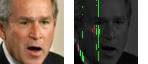

CORRECTLY CLASSIFIED
MAX ATR: 0.007443169 MIN ATR: 0.0 THRESH: 0.003721584565937519


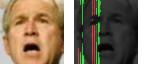

CORRECTLY CLASSIFIED
MAX ATR: 0.007638116 MIN ATR: 0.0 THRESH: 0.0038190579507499933


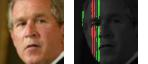

CORRECTLY CLASSIFIED
MAX ATR: 0.008171007 MIN ATR: 0.0 THRESH: 0.00408550351858139


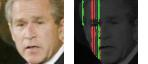

CORRECTLY CLASSIFIED
MAX ATR: 0.008867699 MIN ATR: 0.0 THRESH: 0.004433849360793829


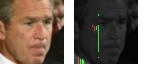

CORRECTLY CLASSIFIED
MAX ATR: 0.008654019 MIN ATR: 0.0 THRESH: 0.004327009432017803


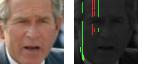

CORRECTLY CLASSIFIED
MAX ATR: 0.00559128 MIN ATR: 0.0 THRESH: 0.0027956399135291576


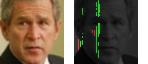

CORRECTLY CLASSIFIED
MAX ATR: 0.009547644 MIN ATR: 0.0 THRESH: 0.004773822147399187


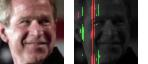

CORRECTLY CLASSIFIED
MAX ATR: 0.008974538 MIN ATR: 0.0 THRESH: 0.004487269092351198


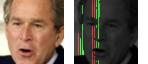

CORRECTLY CLASSIFIED
MAX ATR: 0.006664283 MIN ATR: 0.0 THRESH: 0.0033321415539830923


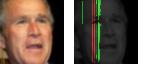

CORRECTLY CLASSIFIED
MAX ATR: 0.0073272623 MIN ATR: 0.0 THRESH: 0.0036636311560869217


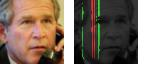

CORRECTLY CLASSIFIED
MAX ATR: 0.0073716706 MIN ATR: 0.0 THRESH: 0.0036858352832496166


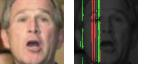

CORRECTLY CLASSIFIED
MAX ATR: 0.0061985003 MIN ATR: 0.0 THRESH: 0.003099250141531229


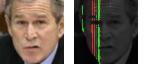

CORRECTLY CLASSIFIED
MAX ATR: 0.009010151 MIN ATR: 0.0 THRESH: 0.004505075514316559


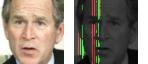

CORRECTLY CLASSIFIED
MAX ATR: 0.006217071 MIN ATR: 0.0 THRESH: 0.0031085354276001453


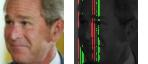

CORRECTLY CLASSIFIED
MAX ATR: 0.0059118643 MIN ATR: 0.0 THRESH: 0.002955932170152664


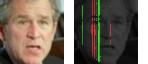

CORRECTLY CLASSIFIED
MAX ATR: 0.0079489695 MIN ATR: 0.0 THRESH: 0.003974484745413065


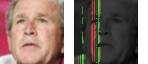

CORRECTLY CLASSIFIED
MAX ATR: 0.006162671 MIN ATR: 0.0 THRESH: 0.0030813354533165693


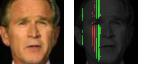

CORRECTLY CLASSIFIED
MAX ATR: 0.0065926244 MIN ATR: 0.0 THRESH: 0.003296312177553773


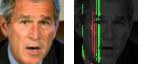

CORRECTLY CLASSIFIED
MAX ATR: 0.0060551823 MIN ATR: 0.0 THRESH: 0.0030275911558419466


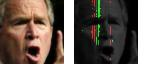

CORRECTLY CLASSIFIED
MAX ATR: 0.006377647 MIN ATR: 0.0 THRESH: 0.0031888235826045275


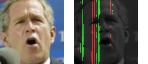

CORRECTLY CLASSIFIED
MAX ATR: 0.008970345 MIN ATR: 0.0 THRESH: 0.004485172685235739


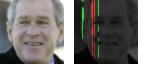

CORRECTLY CLASSIFIED
MAX ATR: 0.007443169 MIN ATR: 0.0 THRESH: 0.003721584565937519


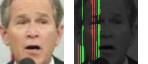

CORRECTLY CLASSIFIED
MAX ATR: 0.006556795 MIN ATR: 0.0 THRESH: 0.0032783974893391132


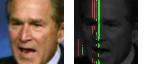

CORRECTLY CLASSIFIED
MAX ATR: 0.0060394406 MIN ATR: 0.0 THRESH: 0.0030197203159332275


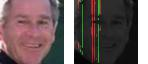

CORRECTLY CLASSIFIED
MAX ATR: 0.006735942 MIN ATR: 0.0 THRESH: 0.0033679709304124117


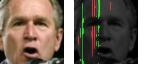

CORRECTLY CLASSIFIED
MAX ATR: 0.005768547 MIN ATR: 0.0 THRESH: 0.0028842734172940254


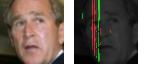

CORRECTLY CLASSIFIED
MAX ATR: 0.008837122 MIN ATR: 0.0 THRESH: 0.004418560769408941


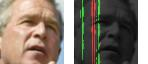

CORRECTLY CLASSIFIED
MAX ATR: 0.008082192 MIN ATR: 0.0 THRESH: 0.004041096195578575


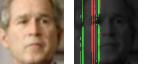

CORRECTLY CLASSIFIED
MAX ATR: 0.007130067 MIN ATR: 0.0 THRESH: 0.003565033432096243


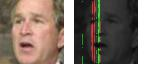

CORRECTLY CLASSIFIED
MAX ATR: 0.006664283 MIN ATR: 0.0 THRESH: 0.0033321415539830923


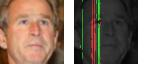

CORRECTLY CLASSIFIED
MAX ATR: 0.0071350913 MIN ATR: 0.0 THRESH: 0.003567545674741268


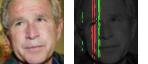

CORRECTLY CLASSIFIED
MAX ATR: 0.009010151 MIN ATR: 0.0 THRESH: 0.004505075514316559


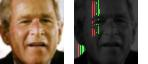

CORRECTLY CLASSIFIED
MAX ATR: 0.0071940394 MIN ATR: 0.0 THRESH: 0.0035970197059214115


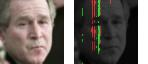

CORRECTLY CLASSIFIED
MAX ATR: 0.008171007 MIN ATR: 0.0 THRESH: 0.00408550351858139


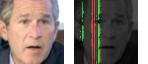

CORRECTLY CLASSIFIED
MAX ATR: 0.008659491 MIN ATR: 0.0 THRESH: 0.0043297456577420235


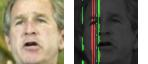

CORRECTLY CLASSIFIED
MAX ATR: 0.00679437 MIN ATR: 0.0 THRESH: 0.0033971848897635937


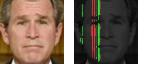

CORRECTLY CLASSIFIED
MAX ATR: 0.006838778 MIN ATR: 0.0 THRESH: 0.0034193890169262886


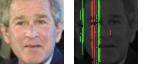

CORRECTLY CLASSIFIED
MAX ATR: 0.007105224 MIN ATR: 0.0 THRESH: 0.003552611917257309


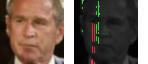

CORRECTLY CLASSIFIED
MAX ATR: 0.007993377 MIN ATR: 0.0 THRESH: 0.003996688406914473


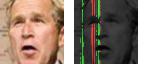

CORRECTLY CLASSIFIED
MAX ATR: 0.0051236157 MIN ATR: 0.0 THRESH: 0.0025618078652769327


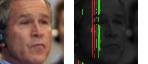

CORRECTLY CLASSIFIED
MAX ATR: 0.006950919 MIN ATR: 0.0 THRESH: 0.003475459525361657


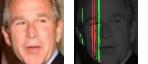

CORRECTLY CLASSIFIED
MAX ATR: 0.007087036 MIN ATR: 0.0 THRESH: 0.003543518017977476


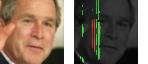

CORRECTLY CLASSIFIED
MAX ATR: 0.006749963 MIN ATR: 0.0 THRESH: 0.0033749814610928297


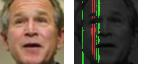

CORRECTLY CLASSIFIED
MAX ATR: 0.0071496316 MIN ATR: 0.0 THRESH: 0.0035748158115893602


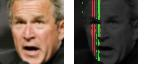

CORRECTLY CLASSIFIED
MAX ATR: 0.006556795 MIN ATR: 0.0 THRESH: 0.0032783974893391132


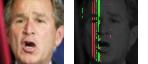

CORRECTLY CLASSIFIED
MAX ATR: 0.007087036 MIN ATR: 0.0 THRESH: 0.003543518017977476


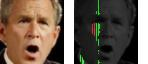

CORRECTLY CLASSIFIED
MAX ATR: 0.009695331 MIN ATR: 0.0 THRESH: 0.0048476653173565865


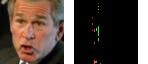

CORRECTLY CLASSIFIED
MAX ATR: 0.0073272623 MIN ATR: 0.0 THRESH: 0.0036636311560869217


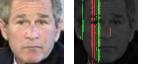

CORRECTLY CLASSIFIED
MAX ATR: 0.0071496316 MIN ATR: 0.0 THRESH: 0.0035748158115893602


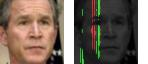

CORRECTLY CLASSIFIED
MAX ATR: 0.00679437 MIN ATR: 0.0 THRESH: 0.0033971848897635937


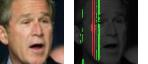

len cls: 39 SUPPORT: 38
len cls: 36 SUPPORT: 24
len cls: 30 SUPPORT: 10
len cls: 8 SUPPORT: 8
len cls: 6 SUPPORT: 5
len cls: 3 SUPPORT: 3
len cls: 2 SUPPORT: 2
len cls: 3 SUPPORT: 2
len cls: 2 SUPPORT: 2
len cls: 2 SUPPORT: 2
len cls: 2 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1
len cls: 1 SUPPORT: 1


In [39]:
print("layer:", LAYER)
#",label:", LABEL)
invariants = get_all_invariants_impure(basic_estimator)
describe_invariants_all_labels(invariants,prev_lay,curr_lay)


#ref_id = 3
#print("### Cluster ###")
#cluster, neuron_ids, neuron_sig = get_invariant(basic_estimator, ref_id)
#describe_cluster(cluster, neuron_ids, show_samples=True)

# Visualize  10 inputs in the cluster
#for i in cluster[:10]:
#show_img(visualize_conductances(mnist.train.images[ref_id], train_predictions[ref_id], neuron_ids, only_on=False))
    
#print "###  BASIC DECISION TREE ###"




## Print invariant stats
#describe_all_invariants(invariants,t_fc1,t_fc1)
#describe_all_invariantsFull(invariants,True,t_fc2)
#print "Total num invariants:", df['Num Invariants'].sum()
#print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)

### OTHER INPUTS ####
#for indxi in range(0,len(mnist_inp_images)):
#    inp = mnist_inp_images[indxi]
#    lab = mnist_inp_labels[indxi] 
#    print(indxi, lab)
#    describe_input_INP(indxi)
##    print "###  BASIC DECISION TREE Cluster ###"
#    if (indxi == 0):
#       cluster, neuron_ids, neuron_sig = get_invariant_inp(basic_estimator,indxi )
#       print('LEN CLUSTER:',len(cluster),is_consistent_cluster(cluster,train_predictions))
 #  # describe_cluster(cluster, neuron_ids)

#    print "###  RELATIVE DECISION TREE Cluster ###"
#    cluster, neuron_ids, neuron_sig = get_invariant(relative_estimators[lab], indxi)
#    describe_cluster(cluster, neuron_ids)
   
    
#print "###  BASIC DECISION TREE ###"
#invariants = get_all_invariants(basic_estimator)
## Print invariant stats
#describe_all_invariants1(invariants)
#describe_all_invariantsFull(invariants,True,t_fc2)
#print "Total num invariants:", df['Num Invariants'].sum()
#print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)


#for cl in invariants.keys():
#  print(cl,invariants[cl])
  
#print "###  RELATIVE DECISION TREE for CLASS 0"
#invariants = get_all_invariants(relative_estimators[0])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
##for cl in invariants.keys():
##   print(cl,invariants[cl])

#print "###  RELATIVE DECISION TREE for CLASS 1"
#invariants = get_all_invariants(relative_estimators[1])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
##for cl in invariants.keys():
##   print(cl,invariants[cl])
    
#print "###  RELATIVE DECISION TREE for CLASS 2"
#invariants = get_all_invariants(relative_estimators[2])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
##for cl in invariants.keys():
##   print(cl,invariants[cl])
    
#print "###  RELATIVE DECISION TREE for CLASS 3"
#invariants = get_all_invariants(relative_estimators[3])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
##for cl in invariants.keys():
##   print(cl,invariants[cl])
    
#print "###  RELATIVE DECISION TREE for CLASS 4"
#invariants = get_all_invariants(relative_estimators[4])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
##for cl in invariants.keys():
##   print(cl,invariants[cl])
    
#print "###  RELATIVE DECISION TREE for CLASS 5"
#invariants = get_all_invariants(relative_estimators[5])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
##for cl in invariants.keys():
##   print(cl,invariants[cl])

#print "###  RELATIVE DECISION TREE for CLASS 6"
#invariants = get_all_invariants(relative_estimators[6])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
##for cl in invariants.keys():
##   print(cl,invariants[cl])
    
#print "###  RELATIVE DECISION TREE for CLASS 7"
#invariants = get_all_invariants(relative_estimators[7])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
##for cl in invariants.keys():
##   print(cl,invariants[cl])
    
#print "###  RELATIVE DECISION TREE for CLASS 8"
#invariants = get_all_invariants(relative_estimators[8])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
#for cl in invariants.keys():
#   print(cl,invariants[cl])
    
#print "###  RELATIVE DECISION TREE for CLASS 9"
#invariants = get_all_invariants(relative_estimators[9])
#df = describe_all_invariants(invariants)
##print "Total num invariants:", df['Num Invariants'].sum()
##print "Total num invariants with cluster size >= 10:", df['Num Invariants with cluster size >= 10'].sum()
#print df.to_string(index=False)
##for cl in invariants.keys():
##   print(cl,invariants[cl])





